# <Center> <b>EDA On Mobile Dataset

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
df = pd.read_csv('mobiles_eda_ready.csv')

<span style="font-size: 18px;"> <b> <center> Why we do EDA on this mobile dataset? </b> </center>
- Firstly, for the purpose of showcases the finding in blog, website, linkedin etc.
- For the training a machine learning model which require deep understanding of the dataset
- For filling the missing values by deeply understanding the dataset.

<span style="font-size: 18px;"> <b> <center> Summary of step of EDA: </b> </center>
- Do Univariate analysis
- Do Bivariate analysis
- Do Multivariate analysis
- Do Feature engineering and also fill missing values 

<span style="font-size: 18px;"> <b> <center> OUR GOAL: </b> </center>
- In the future we are gonna build a mobile price prediction model so our EDA is based on that goal.

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Name               1020 non-null   object 
 1   brand_name                 1020 non-null   object 
 2   Price                      1020 non-null   int64  
 3   Rating                     1020 non-null   float64
 4   Spec_Score                 1020 non-null   int64  
 5   has_dual_sim               1020 non-null   int64  
 6   has_3g                     1020 non-null   int64  
 7   has_4g                     1020 non-null   int64  
 8   has_5g                     1020 non-null   int64  
 9   has_nfc                    1020 non-null   int64  
 10  has_ir_blaster             1020 non-null   int64  
 11  processor_name             970 non-null    object 
 12  processor_brand            970 non-null    object 
 13  cores                      965 non-null    float

In [216]:
df.isnull().sum()

Product_Name                  0
brand_name                    0
Price                         0
Rating                        0
Spec_Score                    0
has_dual_sim                  0
has_3g                        0
has_4g                        0
has_5g                        0
has_nfc                       0
has_ir_blaster                0
processor_name               50
processor_brand              50
cores                        55
cpu_speed_ghz                77
ram_gb                        4
rom_gb                        6
battery_capacity_mah          0
fast_charging_available       0
fast_charging_speed_w        53
display_size_inches           0
resolution_width              9
resolution_height             9
display_frequency_hz          0
front_camera_mp              62
front_camera_secondary_mp     0
rear_camera_mp                4
rear_camera_secondary_mp      0
rear_camera_tertiary_mp       0
rear_camera_count             0
card_supported                0
device_t

## <center> <b> Univariate Analysis

In [217]:
df.head()

,Product_Name,brand_name,Price,Rating,Spec_Score,has_dual_sim,has_3g,has_4g,has_5g,has_nfc,...,front_camera_mp,front_camera_secondary_mp,rear_camera_mp,rear_camera_secondary_mp,rear_camera_tertiary_mp,rear_camera_count,card_supported,device_type,os_type,os_version
0,Samsung Galaxy S25 Ultra,samsung,108460,4.15,93,1,1,1,1,1,...,12.0,0.0,200.0,12.0,0.0,4,0,smartphone,Android,15.0
1,Samsung Galaxy S25 FE,samsung,59999,4.70,86,1,1,1,1,1,...,12.0,0.0,50.0,12.0,8.0,3,0,smartphone,Android,16.0
2,OnePlus Nord CE 5 5G,oneplus,24998,4.10,83,1,1,1,1,0,...,16.0,0.0,50.0,8.0,16.0,2,1,smartphone,Android,15.0
3,Realme Narzo 90,realme,16999,4.40,72,1,1,1,1,0,...,50.0,0.0,50.0,2.0,50.0,2,1,smartphone,Android,15.0
4,Vivo T3 Ultra,vivo,22799,4.10,82,1,1,1,1,0,...,50.0,0.0,50.0,8.0,50.0,2,1,smartphone,Android,14.0


<span style="font-size: 18px;"> <b> <center>brand_name  -> categorical column

In [218]:
df['brand_name'].value_counts() # most number of phones

brand_name
realme       144
samsung      143
vivo         123
xiaomi        80
oppo          80
motorola      66
oneplus       49
poco          49
lava          38
apple         37
iqoo          32
tecno         26
infinix       25
google        19
nothing       17
hmd           15
nokia          9
itel           8
peace          8
jio            7
honor          6
snexian        5
blackzone      5
ikall          5
cmf            4
ai+            4
alcatel        2
mtr            2
acer           2
gfive          2
philips        2
gamma          1
foneme         1
mixx           1
amaq           1
micromax       1
hotline        1
Name: count, dtype: int64

<Axes: xlabel='brand_name'>

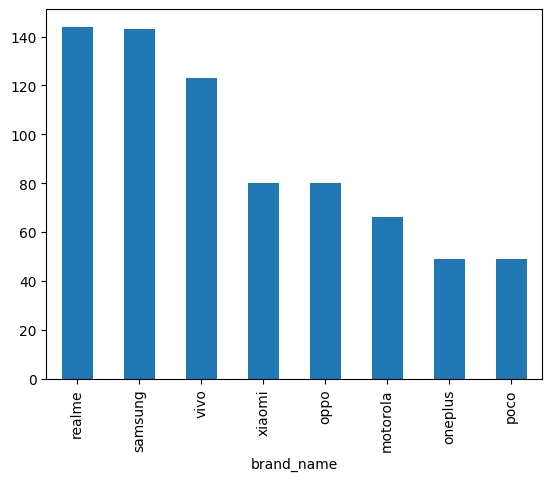

In [219]:
# plot a graph of top 8 brand 

df['brand_name'].value_counts().head(8).plot(kind='bar')

<Axes: ylabel='count'>

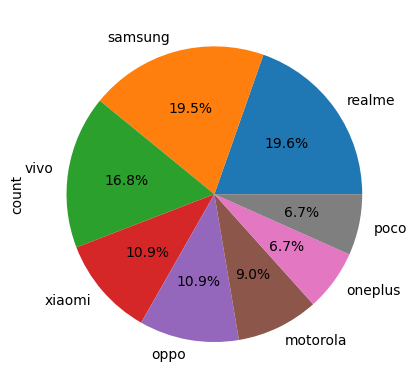

In [220]:
# to see in percentage use pie chart 

df['brand_name'].value_counts().head(8).plot(kind='pie', autopct= '%0.1f%%')

In [221]:
df['brand_name'].isnull().sum()

np.int64(0)

<span style="font-size: 18px;"> <b> <center>Product Name

In [222]:
df['Product_Name'].nunique() # this mobile name column have so many unique values so this columns is not suitable for EDA

661

<span style="font-size: 18px;"> <b> <center>Price

- Price column is highly skewed, mean price is 29k but th median is 20K

In [223]:
df['Price'].describe()

count      1020.000000
mean      29087.034314
std       30726.757780
min         499.000000
25%       12499.000000
50%       19995.500000
75%       30696.750000
max      229900.000000
Name: Price, dtype: float64

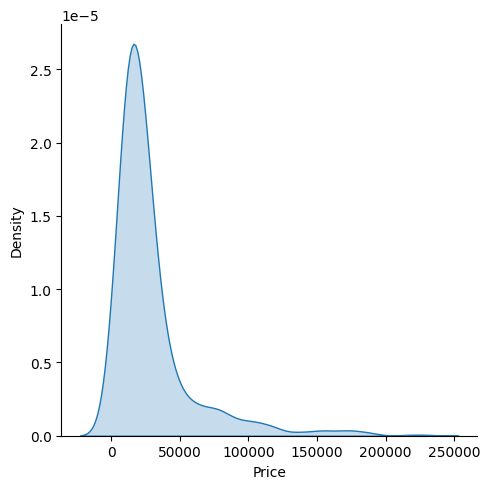

In [224]:
sns.displot(kind='kde', data=df, x='Price', fill=True)

In [225]:
df['Price'].skew() # data is highly skewed, normal 

np.float64(2.848134493191949)

<Axes: ylabel='Price'>

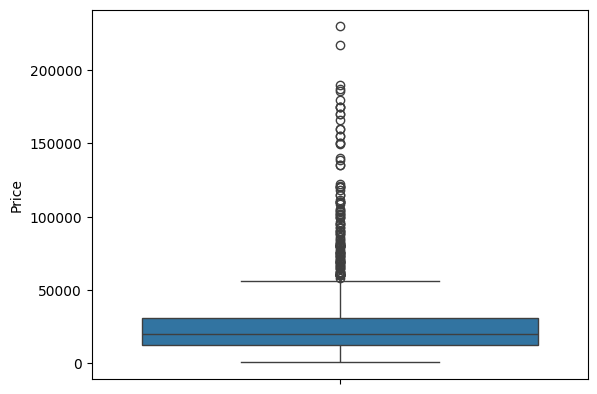

In [226]:
sns.boxplot(df['Price'])

In [227]:
df[df['Price'] > 175000] # as there are not many outlier in the dataset so we don't need to remove the outlier

,Product_Name,brand_name,Price,Rating,Spec_Score,has_dual_sim,has_3g,has_4g,has_5g,has_nfc,...,front_camera_mp,front_camera_secondary_mp,rear_camera_mp,rear_camera_secondary_mp,rear_camera_tertiary_mp,rear_camera_count,card_supported,device_type,os_type,os_version
268,Samsung Galaxy Z Fold 7,samsung,216999,4.60,97,1,1,1,1,1,...,200.0,10.0,200.0,12.0,10.0,3,1,smartphone,Android,16.0
291,Apple iPhone 17 Pro Max (2TB),apple,229900,4.00,84,1,1,1,1,1,...,18.0,0.0,48.0,48.0,48.0,3,0,smartphone,iOS,26.0
465,Apple iPhone 17 Pro Max (1TB),apple,189900,4.75,83,1,1,1,1,1,...,18.0,0.0,48.0,48.0,48.0,3,0,smartphone,iOS,26.0
672,Samsung Galaxy Z Fold 7,samsung,186999,4.75,95,1,1,1,1,1,...,200.0,10.0,200.0,12.0,10.0,3,1,smartphone,Android,16.0
790,Apple iPhone 15 Pro Max,apple,179900,4.60,87,1,1,1,1,1,...,12.0,0.0,48.0,12.0,12.0,3,0,smartphone,iOS,17.0
996,Samsung Galaxy Z Fold 6,samsung,185999,4.25,91,1,1,1,1,1,...,50.0,4.0,50.0,12.0,10.0,3,0,smartphone,Unknown,NaN


In [228]:
df['Price'].isnull().sum()

np.int64(0)

<span style="font-size: 18px;"> <b> <center>Rating

In [229]:
df['Rating'].describe()

count    1020.000000
mean        4.378284
std         0.233885
min         3.900000
25%         4.150000
50%         4.400000
75%         4.600000
max         4.750000
Name: Rating, dtype: float64

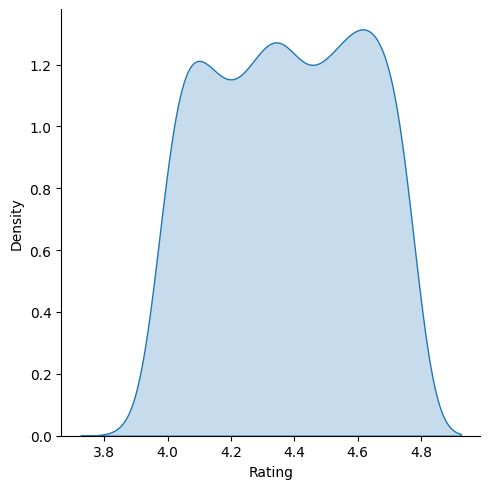

In [230]:
sns.displot(kind='kde', data=df, x='Rating', fill=True, )

<Axes: ylabel='Rating'>

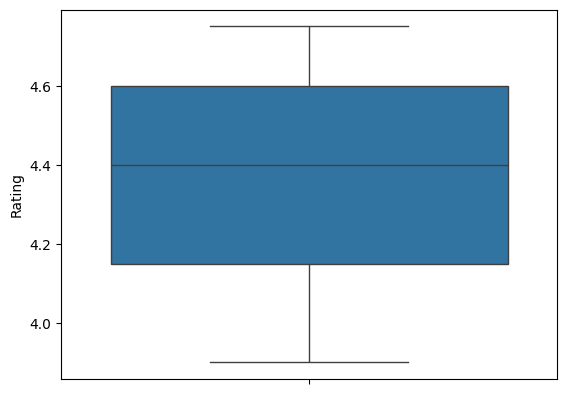

In [231]:
sns.boxplot(df['Rating'])

In [232]:
df['Rating'].skew()

np.float64(-0.04334885737713016)

In [233]:
df['Rating'].isnull().sum()

np.int64(0)

<span style="font-size: 18px;"> <b> <Center>Spec Score

- Spec score of feature phone are very low, those are outlier in the data

In [234]:
df['Spec_Score'].describe()

count    1020.000000
mean       75.650980
std        17.095579
min         7.000000
25%        74.000000
50%        80.000000
75%        84.000000
max        97.000000
Name: Spec_Score, dtype: float64

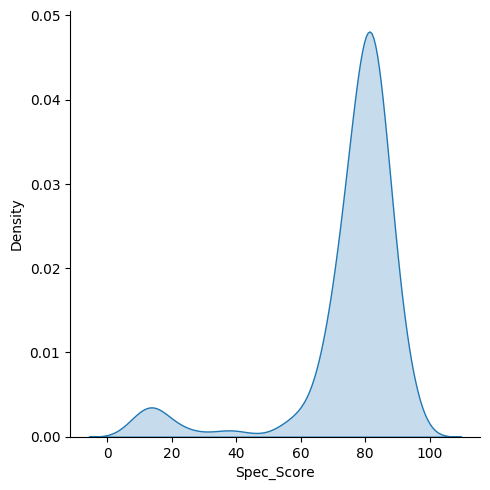

In [235]:
sns.displot(kind='kde', data=df, x='Spec_Score', fill=True)

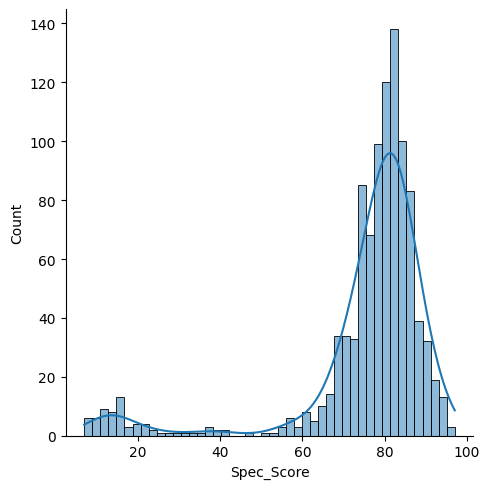

In [236]:
sns.displot(kind='hist', data=df, x='Spec_Score', kde=True)

In [237]:
df['Spec_Score'].skew()

np.float64(-2.649539928402178)

<Axes: ylabel='Spec_Score'>

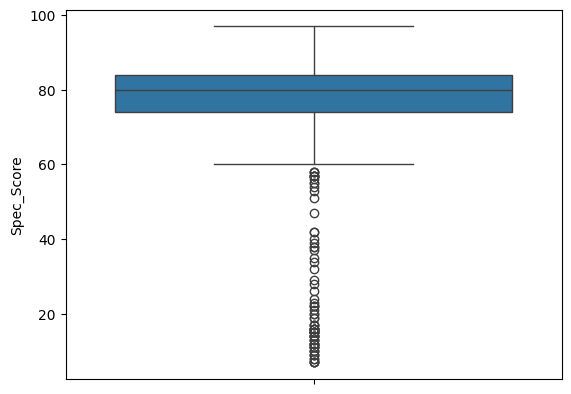

In [238]:
sns.boxplot(df['Spec_Score'])

In [239]:
df['Spec_Score'].isnull().sum()

np.int64(0)

<span style="font-size: 18px;"> <b> <center> Which sim type

In [240]:
df.columns

Index(['Product_Name', 'brand_name', 'Price', 'Rating', 'Spec_Score',
       'has_dual_sim', 'has_3g', 'has_4g', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_name', 'processor_brand', 'cores',
       'cpu_speed_ghz', 'ram_gb', 'rom_gb', 'battery_capacity_mah',
       'fast_charging_available', 'fast_charging_speed_w',
       'display_size_inches', 'resolution_width', 'resolution_height',
       'display_frequency_hz', 'front_camera_mp', 'front_camera_secondary_mp',
       'rear_camera_mp', 'rear_camera_secondary_mp', 'rear_camera_tertiary_mp',
       'rear_camera_count', 'card_supported', 'device_type', 'os_type',
       'os_version'],
      dtype='object')

In [241]:
df['has_3g'].value_counts()

has_3g
1    979
0     41
Name: count, dtype: int64

<Axes: ylabel='count'>

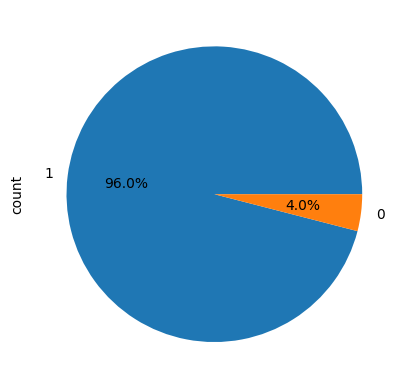

In [242]:
df['has_3g'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

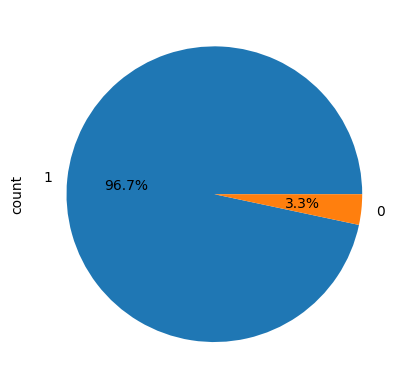

In [243]:
df['has_4g'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

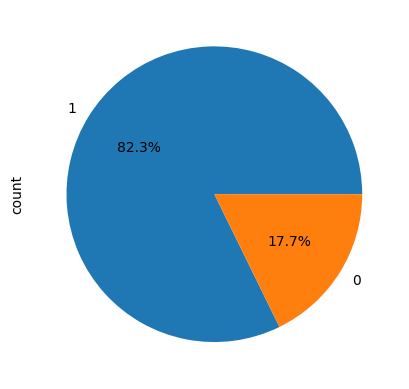

In [244]:
df['has_5g'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

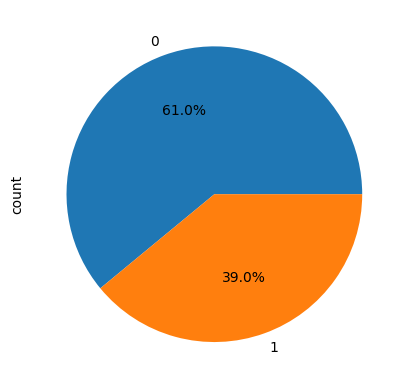

In [245]:
df['has_nfc'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

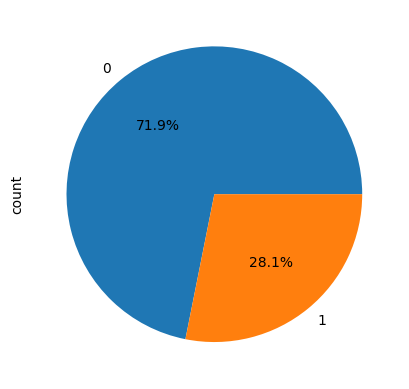

In [246]:
df['has_ir_blaster'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [247]:
df[df['has_ir_blaster'] == 1]['brand_name'].value_counts()

brand_name
xiaomi     61
oppo       35
poco       34
vivo       33
oneplus    33
realme     30
tecno      23
iqoo       18
infinix    17
honor       2
itel        1
Name: count, dtype: int64

In [248]:
df[df['has_ir_blaster'] == 1]['Price'].mean()

np.float64(31633.912891986063)

<span style="font-size: 18px;"> <b> <center> Processor Brand

In [249]:
df['processor_brand'].value_counts() # Helio, Dimensity and Mediatek are same brand

processor_brand
Dimensity     407
Snapdragon    338
Unisoc         60
Exynos         59
Helio          47
Apple          37
Tensor         19
MediaTek        2
AMD             1
Name: count, dtype: int64

<Axes: ylabel='count'>

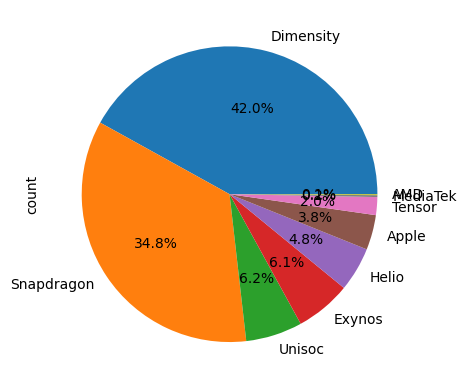

In [250]:
df['processor_brand'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<span style="font-size: 18px;"> <b><center> Number of cores

In [251]:
df['cores'].value_counts()

cores
8.0     899
6.0      37
1.0      13
10.0     11
9.0       3
4.0       2
Name: count, dtype: int64

<Axes: ylabel='count'>

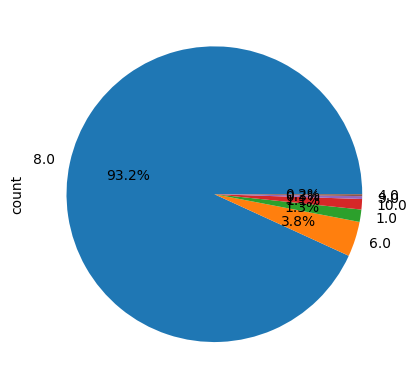

In [252]:
df['cores'].value_counts().plot(kind='pie', autopct='%0.1f%%') # number of cores values are 93% percent are octa cores so it do not contribute too much in the price

<Axes: ylabel='count'>

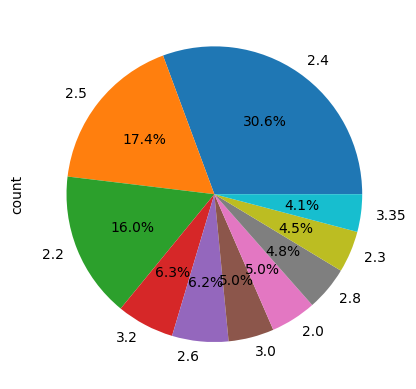

In [253]:
df['cpu_speed_ghz'].value_counts().head(10).plot(kind='pie', autopct='%0.1f%%')

In [254]:
df['battery_capacity_mah'].value_counts().head(12)

battery_capacity_mah
5000    374
6000    114
5500     71
7000     67
6500     29
4500     23
4000     19
1000     19
5200     18
5160     14
5100     14
2000     12
Name: count, dtype: int64

<Axes: ylabel='count'>

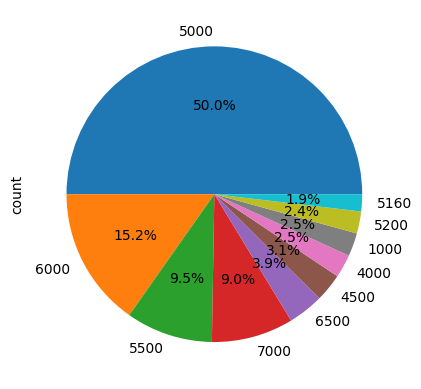

In [255]:
df['battery_capacity_mah'].value_counts().head(10).plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

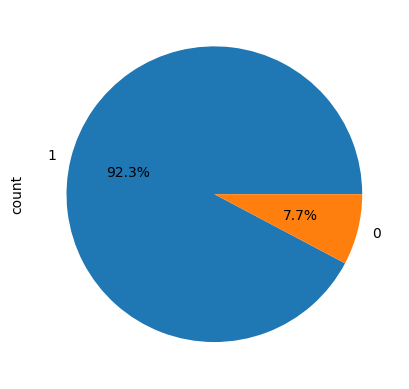

In [256]:
df['fast_charging_available'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [257]:
df['ram_gb'].value_counts()

ram_gb
8.000     421
12.000    189
6.000     150
4.000     142
16.000     36
3.000      18
0.004      16
0.031      16
0.500       7
2.000       5
0.062       4
0.008       4
0.125       2
18.000      1
24.000      1
0.010       1
0.035       1
0.023       1
0.055       1
Name: count, dtype: int64

<Axes: ylabel='count'>

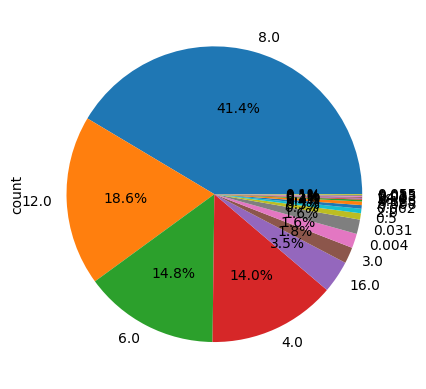

In [258]:
df['ram_gb'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [259]:
df['rom_gb'].value_counts()

rom_gb
128.000     450
256.000     320
512.000      89
64.000       80
0.031        18
0.004        11
1000.000     10
32.000        8
16.000        6
4.000         6
0.016         3
0.125         3
0.035         3
0.062         2
0.008         2
2000.000      1
0.002         1
3.000         1
Name: count, dtype: int64

<Axes: ylabel='count'>

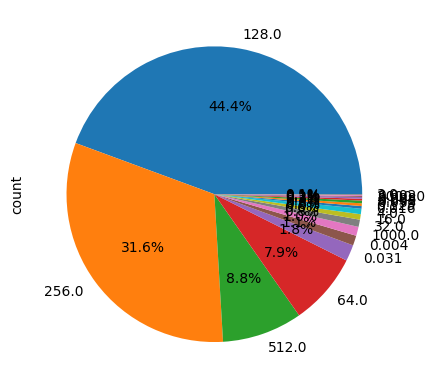

In [260]:
df['rom_gb'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [261]:
df['display_frequency_hz'].value_counts()

display_frequency_hz
120    655
60     151
90     131
144     77
165      6
Name: count, dtype: int64

<Axes: ylabel='count'>

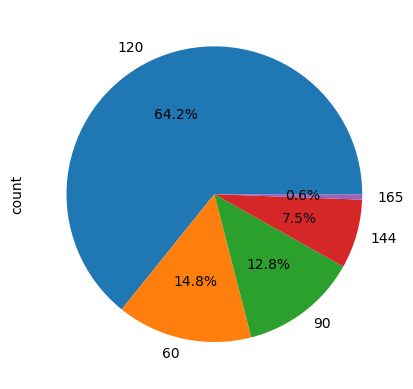

In [262]:
df['display_frequency_hz'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

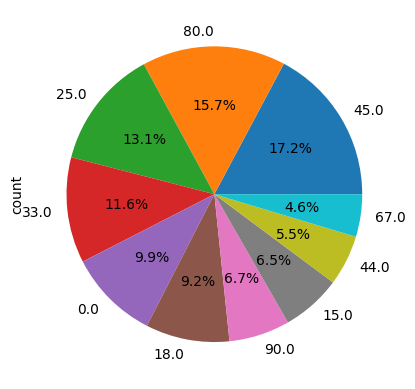

In [263]:
df['fast_charging_speed_w'].value_counts().head(10).plot(kind='pie', autopct='%0.1f%%')

In [264]:
df['rear_camera_count'].value_counts()

rear_camera_count
2    467
3    378
1    119
4     32
0     24
Name: count, dtype: int64

<Axes: ylabel='count'>

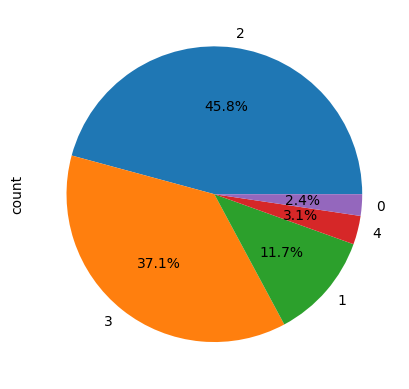

In [265]:
df['rear_camera_count'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [266]:
df['os_type'].value_counts()

os_type
Android    900
Unknown     77
iOS         38
Symbian      5
Name: count, dtype: int64

<Axes: ylabel='count'>

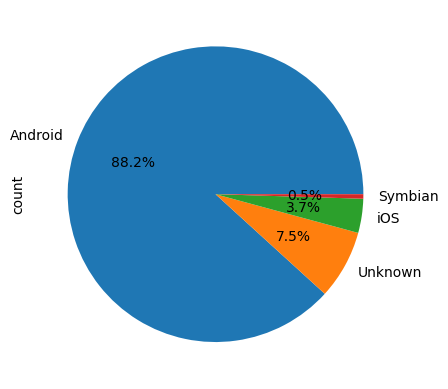

In [267]:
df['os_type'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

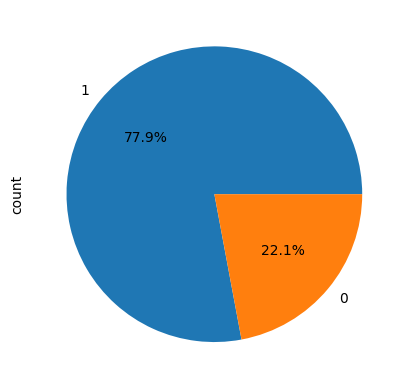

In [268]:
df['card_supported'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

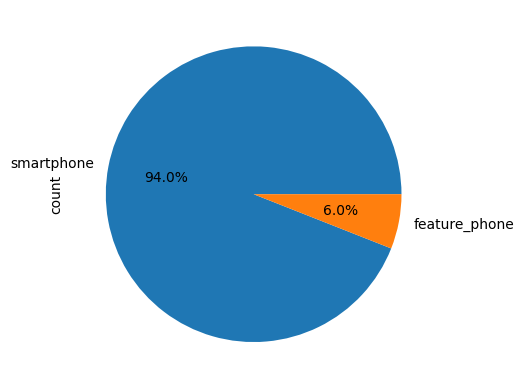

In [269]:
df['device_type'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<span style="font-size: 18px;"> <b><center> Plotting all the numerical columns using function 

In [270]:
def plot_graphs(column_name):
    
    sns.displot(kind='hist', kde=True, data=df, x= column_name, label=column_name)
    
    sns.catplot(kind='box', data= df, x=column_name)

In [271]:
num_columns = df.select_dtypes(include=['float64', 'int64']).iloc[:, 15:].columns

c:\Program Files\Python312\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


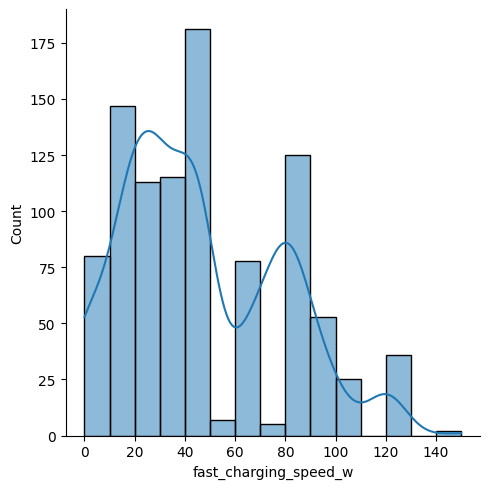

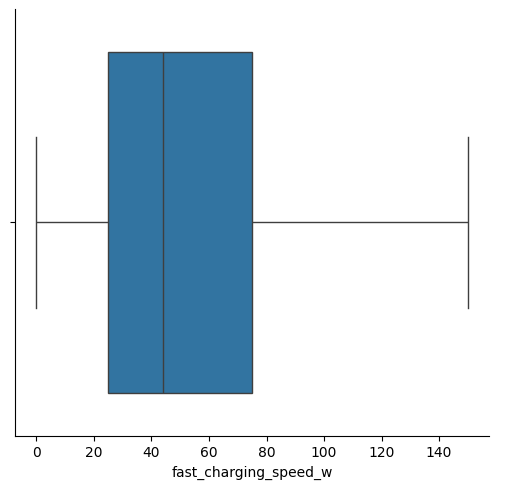

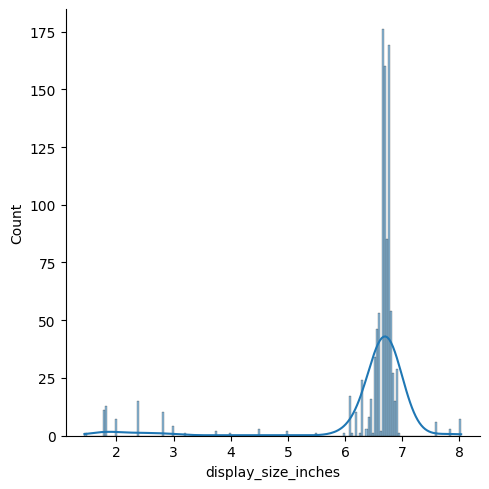

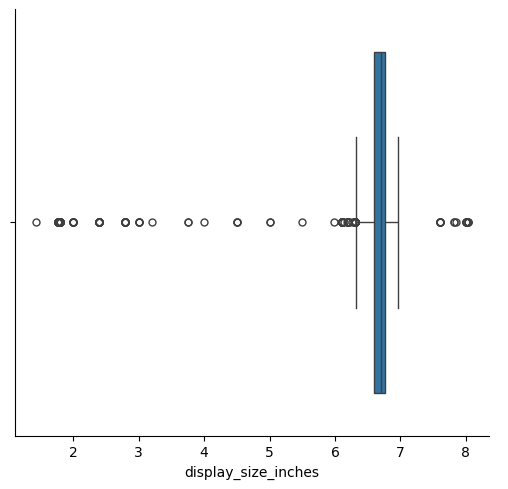

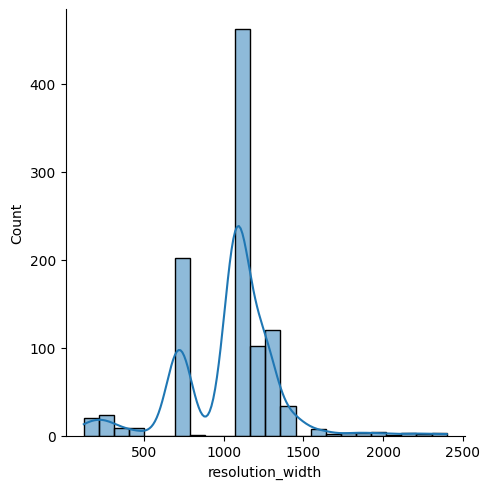

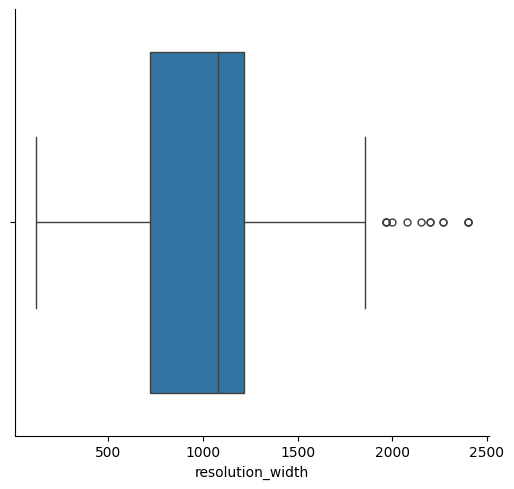

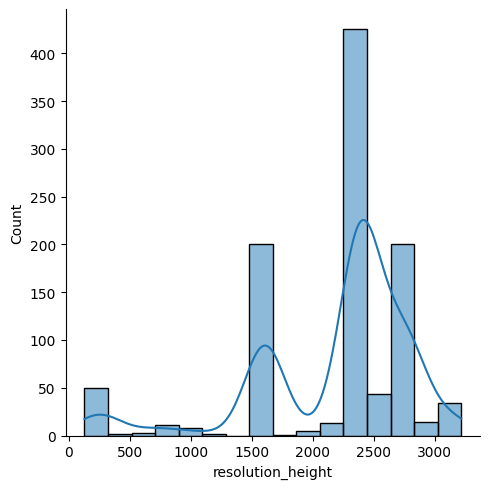

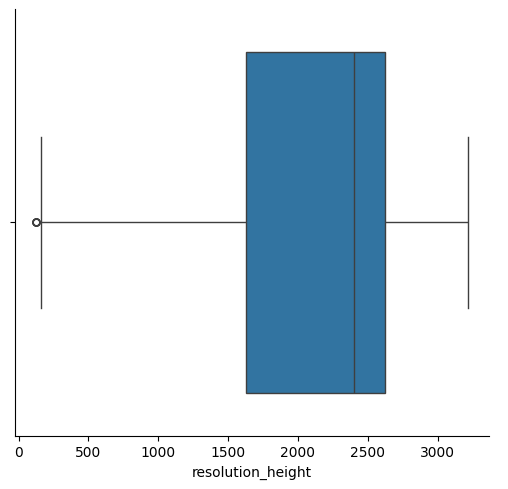

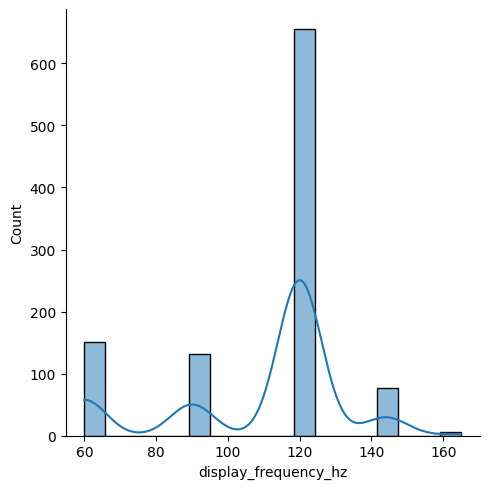

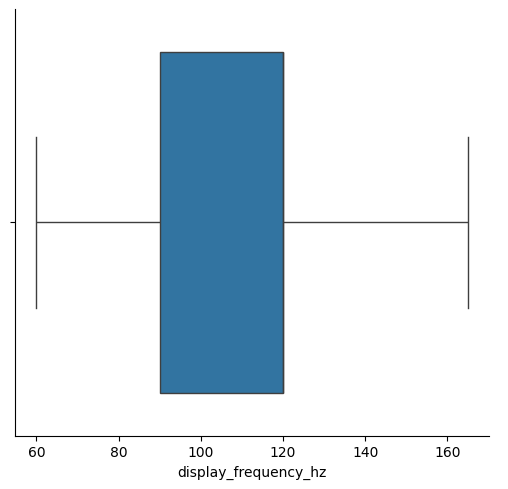

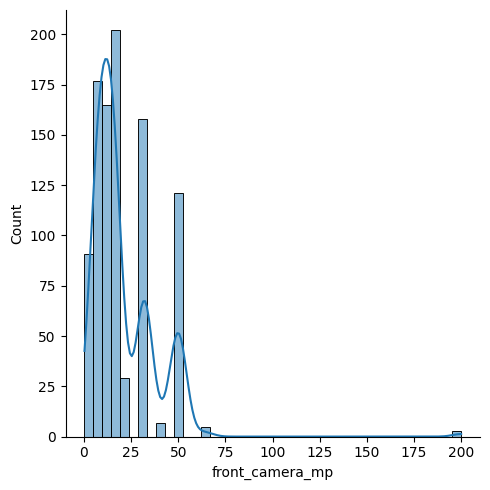

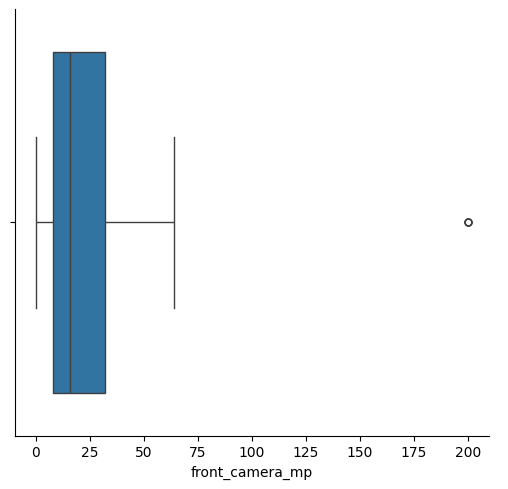

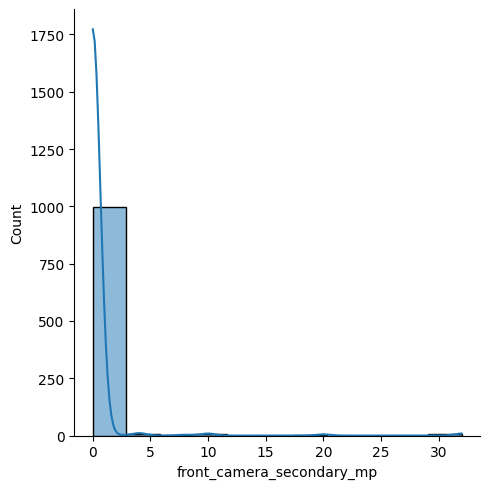

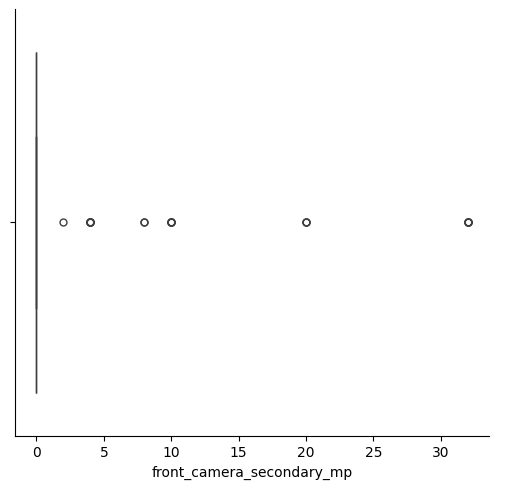

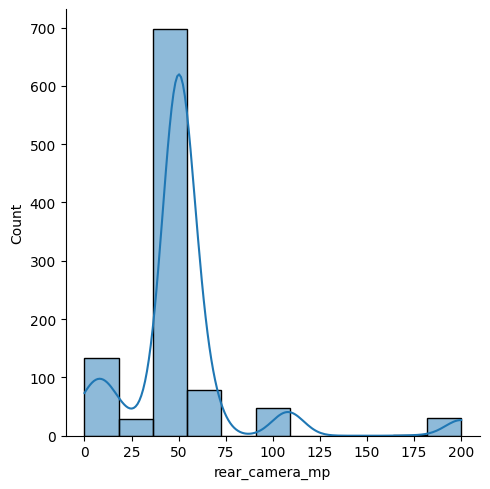

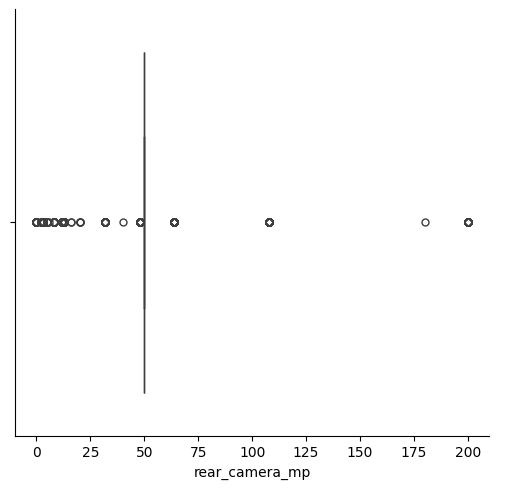

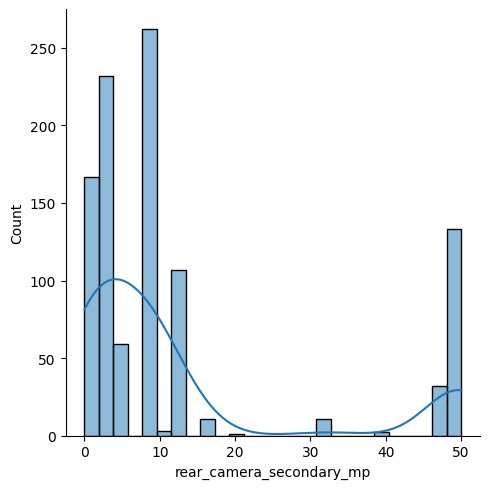

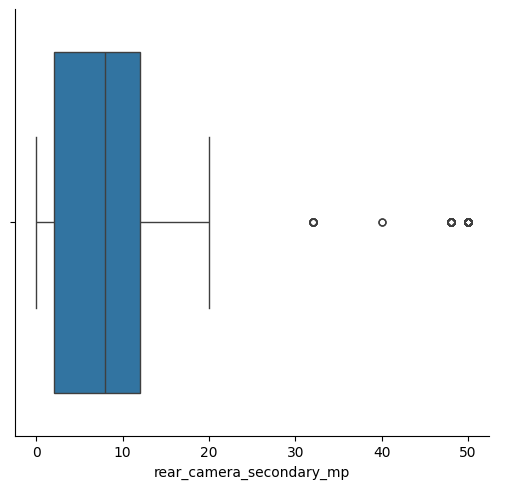

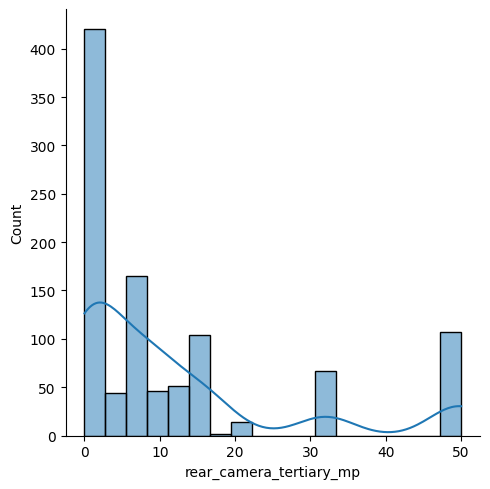

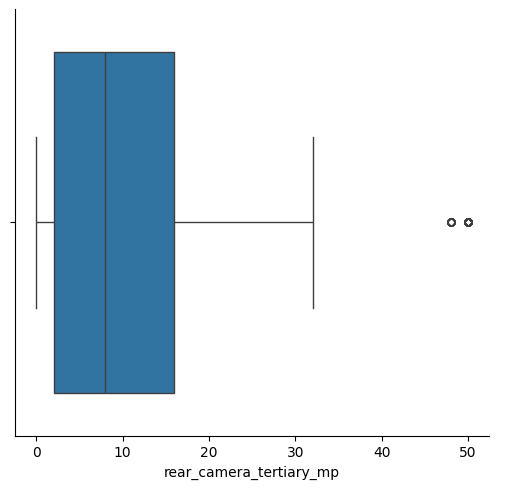

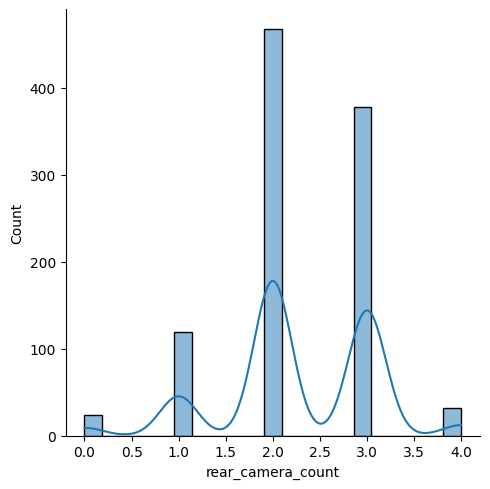

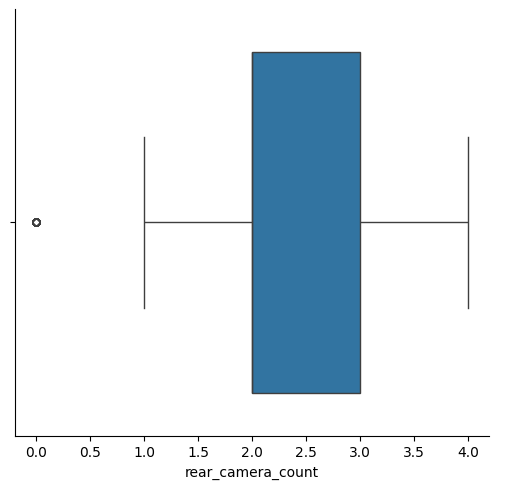

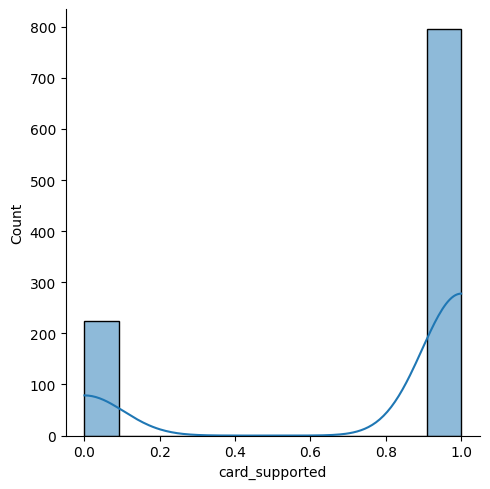

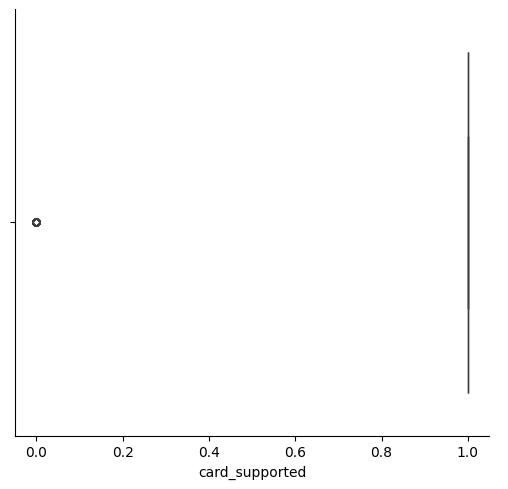

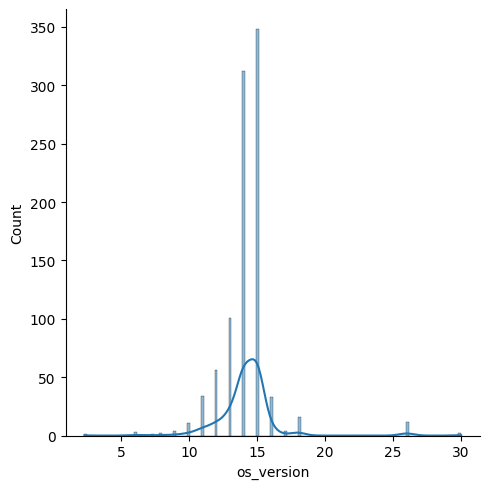

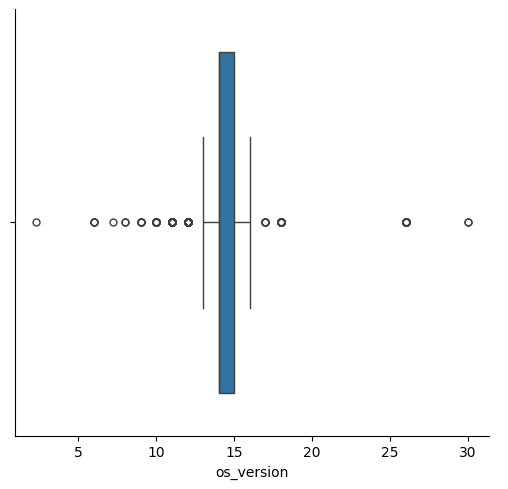

In [272]:
for col in num_columns:
    plot_graphs(col)

## <center> <b>Bivariate Analysis

<span style="font-size: 18px;"> <b> <center> Brand name and Price 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'samsung'),
  Text(1, 0, 'oneplus'),
  Text(2, 0, 'realme'),
  Text(3, 0, 'vivo'),
  Text(4, 0, 'motorola'),
  Text(5, 0, 'oppo'),
  Text(6, 0, 'xiaomi'),
  Text(7, 0, 'apple'),
  Text(8, 0, 'poco'),
  Text(9, 0, 'iqoo'),
  Text(10, 0, 'nothing'),
  Text(11, 0, 'cmf'),
  Text(12, 0, 'google'),
  Text(13, 0, 'tecno'),
  Text(14, 0, 'lava'),
  Text(15, 0, 'infinix'),
  Text(16, 0, 'hmd'),
  Text(17, 0, 'honor'),
  Text(18, 0, 'ai+'),
  Text(19, 0, 'peace'),
  Text(20, 0, 'jio'),
  Text(21, 0, 'itel'),
  Text(22, 0, 'ikall'),
  Text(23, 0, 'blackzone'),
  Text(24, 0, 'nokia'),
  Text(25, 0, 'alcatel'),
  Text(26, 0, 'foneme'),
  Text(27, 0, 'acer'),
  Text(28, 0, 'gamma'),
  Text(29, 0, 'mtr'),
  Text(30, 0, 'philips'),
  Text(31, 0, 'gfive'),
  Text(32, 0, 'mixx'),


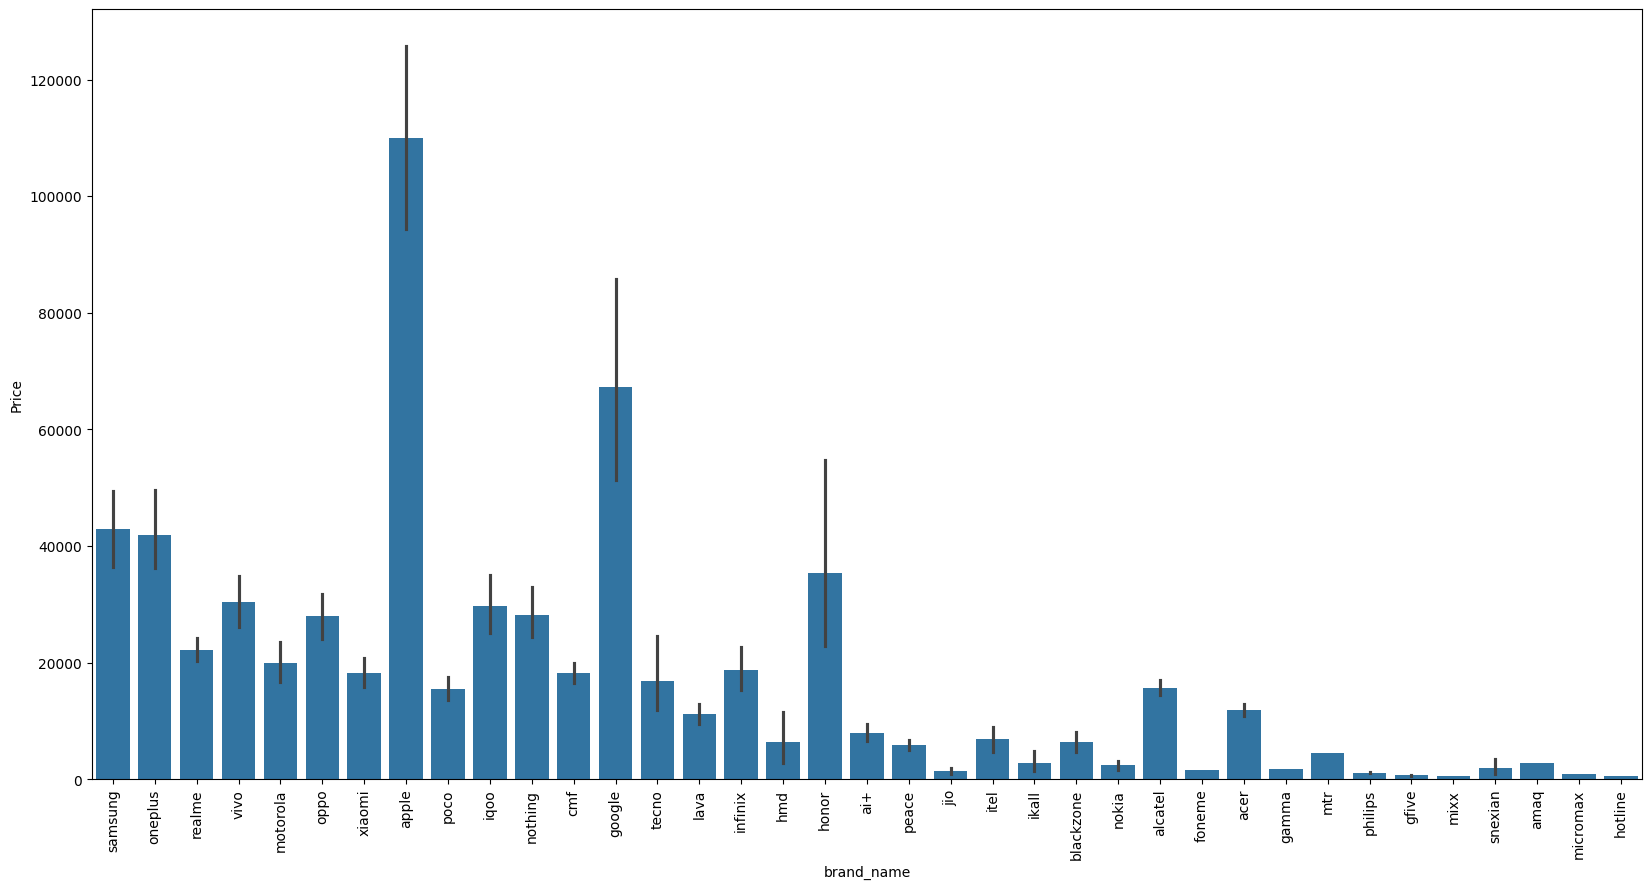

In [273]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='brand_name', y='Price')
plt.xticks(rotation = 90)

In [274]:
# let only study phones who have alteast 10 mobiles in the market

x = df.groupby('brand_name')['brand_name'].count()
x

brand_name
acer           2
ai+            4
alcatel        2
amaq           1
apple         37
blackzone      5
cmf            4
foneme         1
gamma          1
gfive          2
google        19
hmd           15
honor          6
hotline        1
ikall          5
infinix       25
iqoo          32
itel           8
jio            7
lava          38
micromax       1
mixx           1
motorola      66
mtr            2
nokia          9
nothing       17
oneplus       49
oppo          80
peace          8
philips        2
poco          49
realme       144
samsung      143
snexian        5
tecno         26
vivo         123
xiaomi        80
Name: brand_name, dtype: int64

In [275]:
x[x > 10].index

Index(['apple', 'google', 'hmd', 'infinix', 'iqoo', 'lava', 'motorola',
       'nothing', 'oneplus', 'oppo', 'poco', 'realme', 'samsung', 'tecno',
       'vivo', 'xiaomi'],
      dtype='object', name='brand_name')

In [276]:
temp_df = df[df['brand_name'].isin(x[x > 10].index)]
temp_df.head()

,Product_Name,brand_name,Price,Rating,Spec_Score,has_dual_sim,has_3g,has_4g,has_5g,has_nfc,...,front_camera_mp,front_camera_secondary_mp,rear_camera_mp,rear_camera_secondary_mp,rear_camera_tertiary_mp,rear_camera_count,card_supported,device_type,os_type,os_version
0,Samsung Galaxy S25 Ultra,samsung,108460,4.15,93,1,1,1,1,1,...,12.0,0.0,200.0,12.0,0.0,4,0,smartphone,Android,15.0
1,Samsung Galaxy S25 FE,samsung,59999,4.70,86,1,1,1,1,1,...,12.0,0.0,50.0,12.0,8.0,3,0,smartphone,Android,16.0
2,OnePlus Nord CE 5 5G,oneplus,24998,4.10,83,1,1,1,1,0,...,16.0,0.0,50.0,8.0,16.0,2,1,smartphone,Android,15.0
3,Realme Narzo 90,realme,16999,4.40,72,1,1,1,1,0,...,50.0,0.0,50.0,2.0,50.0,2,1,smartphone,Android,15.0
4,Vivo T3 Ultra,vivo,22799,4.10,82,1,1,1,1,0,...,50.0,0.0,50.0,8.0,50.0,2,1,smartphone,Android,14.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'samsung'),
  Text(1, 0, 'oneplus'),
  Text(2, 0, 'realme'),
  Text(3, 0, 'vivo'),
  Text(4, 0, 'motorola'),
  Text(5, 0, 'oppo'),
  Text(6, 0, 'xiaomi'),
  Text(7, 0, 'apple'),
  Text(8, 0, 'poco'),
  Text(9, 0, 'iqoo'),
  Text(10, 0, 'nothing'),
  Text(11, 0, 'google'),
  Text(12, 0, 'tecno'),
  Text(13, 0, 'lava'),
  Text(14, 0, 'infinix'),
  Text(15, 0, 'hmd')])

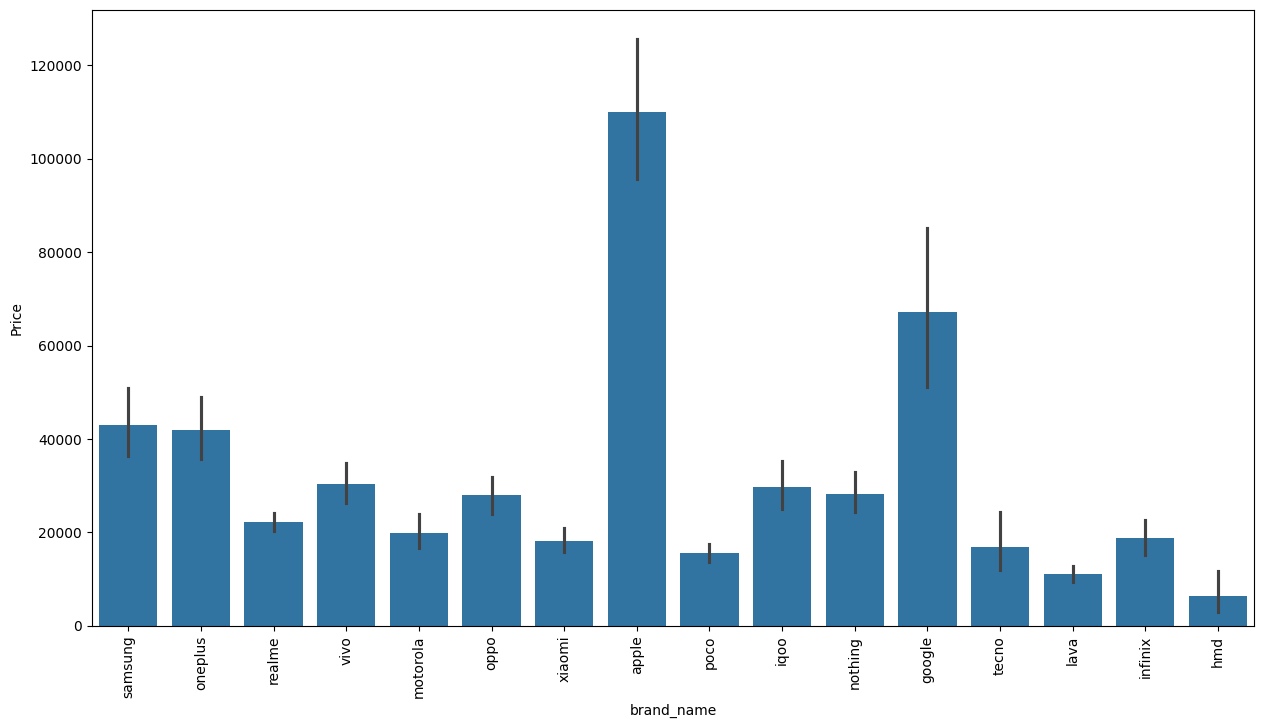

In [277]:
plt.figure(figsize=(15,8))
sns.barplot(data=temp_df, x='brand_name', y='Price')
plt.xticks(rotation = 90)

In [278]:
df['brand_name'].nunique() # as there are 37 unique brand in this dataset, but when we train ML model we have to convert these columns into the number which will gonna take 37 columns and increase the number of the columns of the dataset too much.

# So one way to handle this only take popular brand and convert rest of the brand as other

37

<span style="font-size: 18px;"> <b> <center> Price and Spec_Score

<Axes: xlabel='Spec_Score', ylabel='Price'>

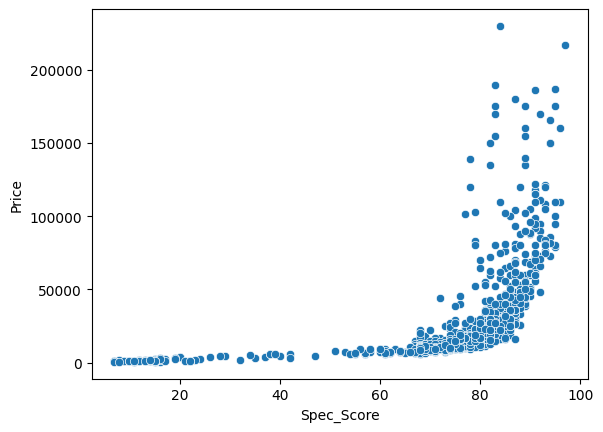

In [279]:
sns.scatterplot(data=df, x='Spec_Score', y='Price')

<span style="font-size: 18px;"> <b> <center> Price and Rating

<Axes: xlabel='Rating', ylabel='Price'>

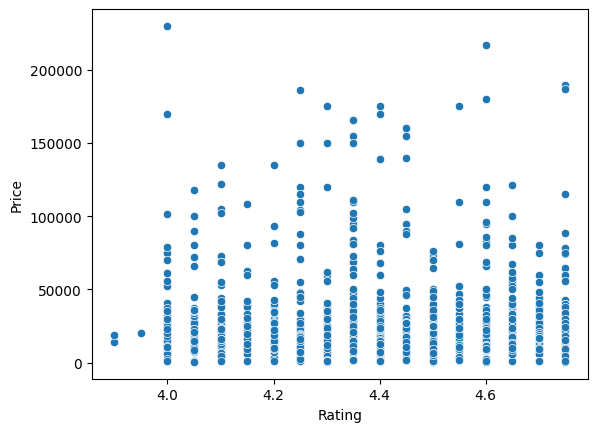

In [280]:
sns.scatterplot(data=df, x='Rating', y='Price')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, '3.9'),
  Text(1, 0, '3.95'),
  Text(2, 0, '4.0'),
  Text(3, 0, '4.05'),
  Text(4, 0, '4.1'),
  Text(5, 0, '4.15'),
  Text(6, 0, '4.2'),
  Text(7, 0, '4.25'),
  Text(8, 0, '4.3'),
  Text(9, 0, '4.35'),
  Text(10, 0, '4.4'),
  Text(11, 0, '4.45'),
  Text(12, 0, '4.5'),
  Text(13, 0, '4.55'),
  Text(14, 0, '4.6'),
  Text(15, 0, '4.65'),
  Text(16, 0, '4.7'),
  Text(17, 0, '4.75')])

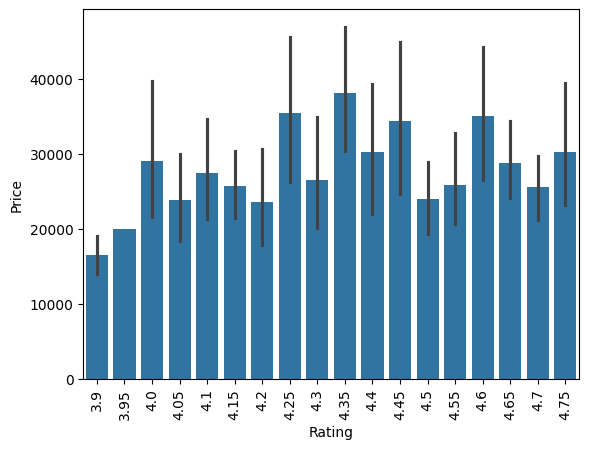

In [281]:
sns.barplot(data=df, x='Rating', y='Price')
plt.xticks(rotation = 90)

<span style="font-size: 18px;"> <b><center> Price and Has_3g

<Axes: xlabel='has_3g', ylabel='Price'>

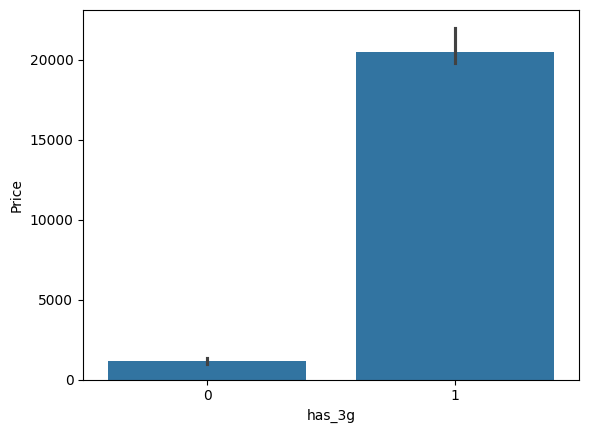

In [282]:
sns.barplot(data=df, x='has_3g', y='Price', estimator = 'median')

<span style="font-size: 18px;"> <b><center> Price and Has_4g

<Axes: xlabel='has_4g', ylabel='Price'>

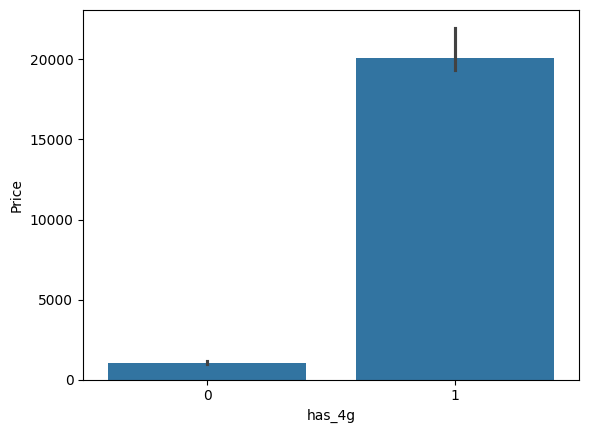

In [283]:
sns.barplot(data=df, x='has_4g', y='Price', estimator = 'median')

<span style="font-size: 18px;"> <b><center> Price and Has_5g

<Axes: xlabel='has_5g', ylabel='Price'>

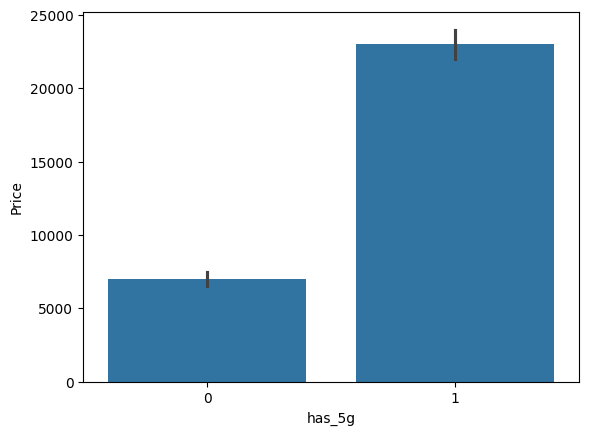

In [284]:
sns.barplot(data=df, x='has_5g', y='Price', estimator = 'median')

<span style="font-size: 18px;"> <b><center> Price and Has_NFC

<Axes: xlabel='has_nfc', ylabel='Price'>

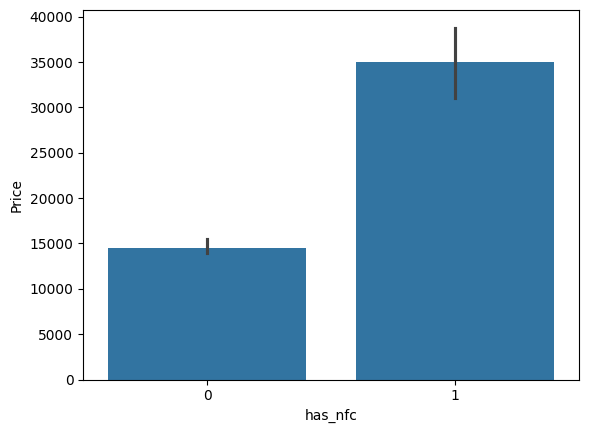

In [285]:
sns.barplot(data=df, x='has_nfc', y='Price', estimator = 'median')

<Axes: xlabel='has_nfc', ylabel='Price'>

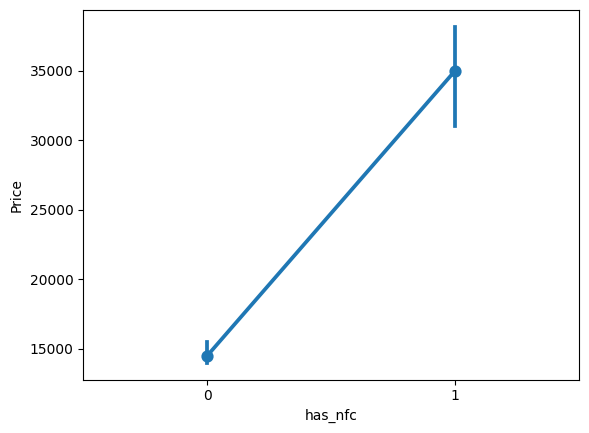

In [286]:
sns.pointplot(data=df, x='has_nfc', y='Price', estimator = 'median')

<span style="font-size: 18px;"> <b><center> Price and Has_ir_blaster

<Axes: xlabel='has_ir_blaster', ylabel='Price'>

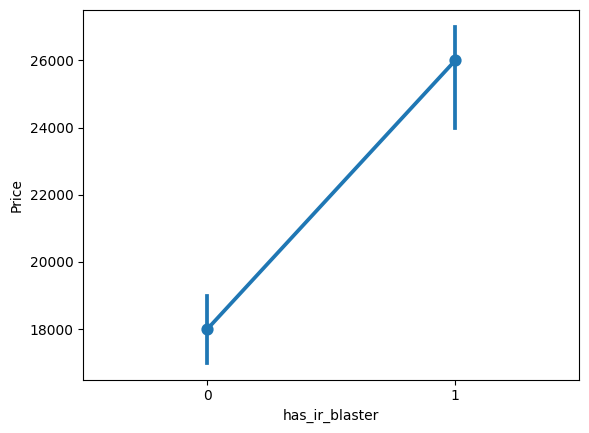

In [287]:
sns.pointplot(data=df, x='has_ir_blaster', y='Price', estimator = 'median')

<Axes: xlabel='has_ir_blaster', ylabel='Price'>

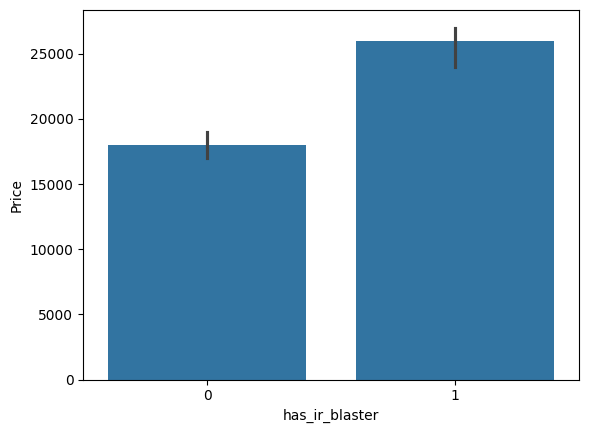

In [288]:
sns.barplot(data=df, x='has_ir_blaster', y='Price', estimator = 'median')

<span style="font-size: 18px;"> <b><center> Price and Processor Brand

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Snapdragon'),
  Text(1, 0, 'Exynos'),
  Text(2, 0, 'Dimensity'),
  Text(3, 0, 'Apple'),
  Text(4, 0, 'Unisoc'),
  Text(5, 0, 'Tensor'),
  Text(6, 0, 'Helio'),
  Text(7, 0, 'MediaTek'),
  Text(8, 0, 'AMD')])

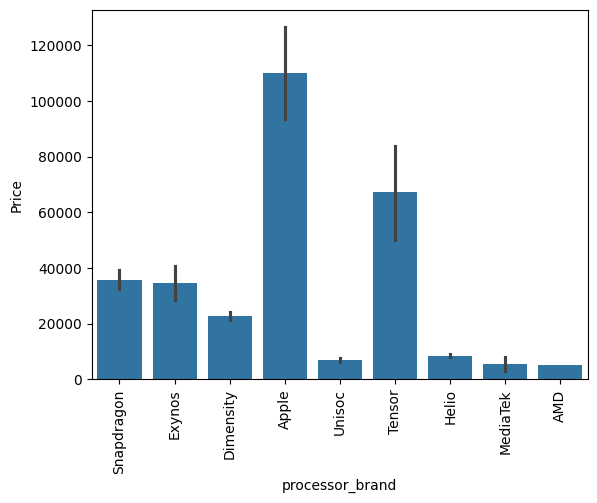

In [289]:
sns.barplot(data=df, x='processor_brand', y='Price')
plt.xticks(rotation=90)

<span style="font-size: 18px;"> <b><center> Price and number of cores

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '1.0'),
  Text(1, 0, '4.0'),
  Text(2, 0, '6.0'),
  Text(3, 0, '8.0'),
  Text(4, 0, '9.0'),
  Text(5, 0, '10.0')])

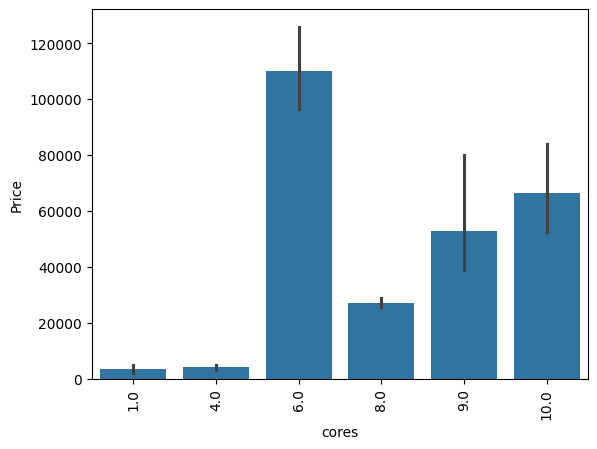

In [290]:
sns.barplot(data=df, x='cores', y='Price')
plt.xticks(rotation=90) 

# this looks sus why the 6 cores is very expensive

In [291]:
pd.crosstab(df['cores'], df['os_type'])

# as you can look only apple phone have 6 cores that why they are expensive

os_type,Android,Symbian,Unknown,iOS
cores,,,,
1.0,5,1,7,0
4.0,2,0,0,0
6.0,0,0,0,37
8.0,878,0,21,0
9.0,3,0,0,0
10.0,9,0,2,0


<span style="font-size: 18px;"> <b><center> Price and processor_speed

<Axes: xlabel='cpu_speed_ghz', ylabel='Price'>

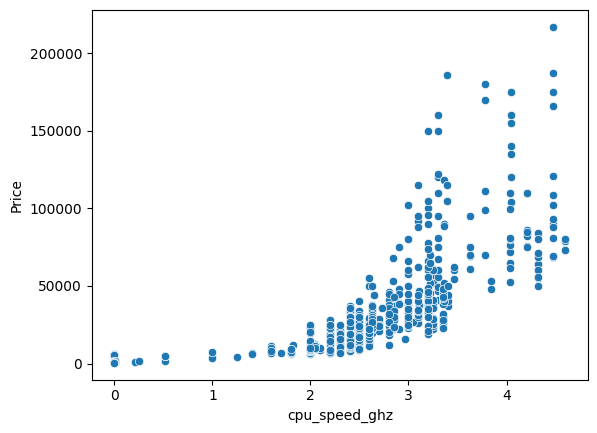

In [292]:
sns.scatterplot(data=df, x='cpu_speed_ghz', y='Price')
# plt.xticks(rotation=90)

<span style="font-size: 18px;"> <b><center> Price and ram

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '0.004'),
  Text(1, 0, '0.008'),
  Text(2, 0, '0.01'),
  Text(3, 0, '0.023'),
  Text(4, 0, '0.031'),
  Text(5, 0, '0.035'),
  Text(6, 0, '0.055'),
  Text(7, 0, '0.062'),
  Text(8, 0, '0.125'),
  Text(9, 0, '0.5'),
  Text(10, 0, '2.0'),
  Text(11, 0, '3.0'),
  Text(12, 0, '4.0'),
  Text(13, 0, '6.0'),
  Text(14, 0, '8.0'),
  Text(15, 0, '12.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '24.0')])

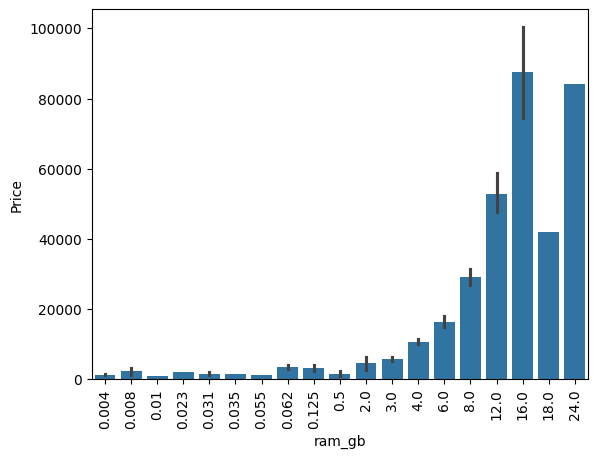

In [293]:
sns.barplot(data=df, x='ram_gb', y='Price')
plt.xticks(rotation=90)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30')])

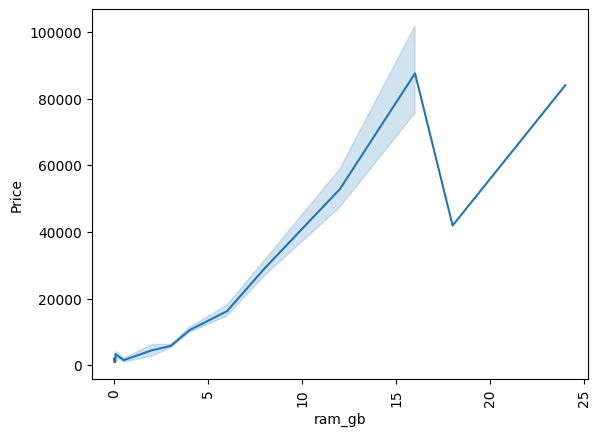

In [294]:
sns.lineplot(data=df, x='ram_gb', y='Price')
plt.xticks(rotation=90)

<span style="font-size: 18px;"> <b><center>Price and ROM

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '16.0'),
  Text(1, 0, '32.0'),
  Text(2, 0, '64.0'),
  Text(3, 0, '128.0'),
  Text(4, 0, '256.0'),
  Text(5, 0, '512.0'),
  Text(6, 0, '1000.0'),
  Text(7, 0, '2000.0')])

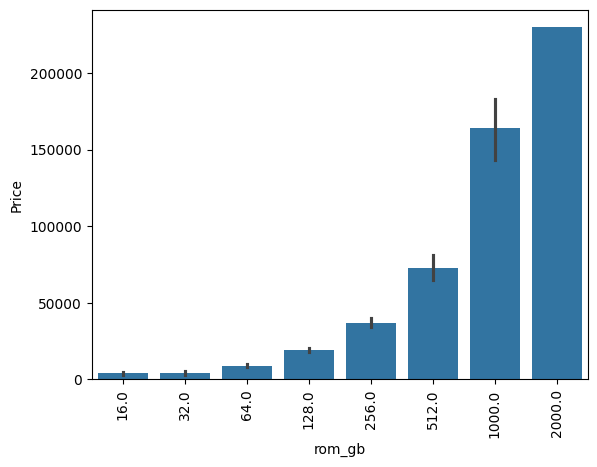

In [295]:
sns.barplot(data=df[df['rom_gb'] > 7], x='rom_gb', y='Price') # mobile with above 8 gb internal memory
plt.xticks(rotation=90)

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 [Text(-250.0, 0, '−250'),
  Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000'),
  Text(2250.0, 0, '2250')])

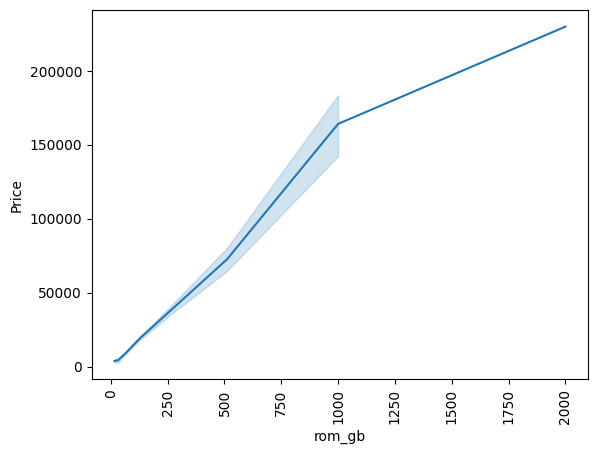

In [296]:
sns.lineplot(data=df[df['rom_gb'] > 7], x='rom_gb', y='Price')
plt.xticks(rotation=90)

In [297]:
df_smart = df[df['device_type'] == 'smartphone']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '0.062'),
  Text(1, 0, '3.0'),
  Text(2, 0, '16.0'),
  Text(3, 0, '32.0'),
  Text(4, 0, '64.0'),
  Text(5, 0, '128.0'),
  Text(6, 0, '256.0'),
  Text(7, 0, '512.0'),
  Text(8, 0, '1000.0'),
  Text(9, 0, '2000.0')])

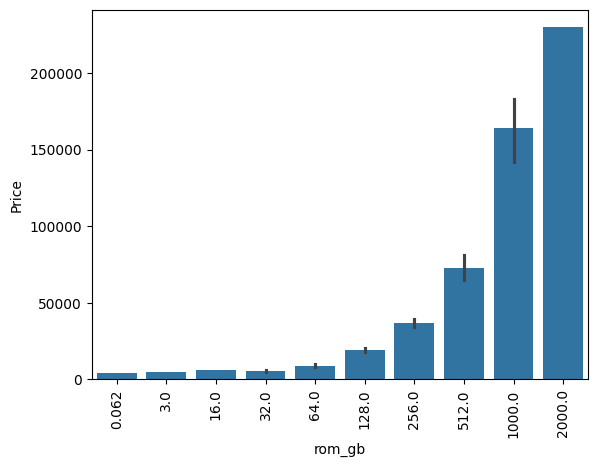

In [298]:
sns.barplot(data=df_smart, x='rom_gb', y='Price') # mobile with above 8 gb internal memory
plt.xticks(rotation=90)

In [299]:
df_smart[df_smart['rom_gb'] < 7]

,Product_Name,brand_name,Price,Rating,Spec_Score,has_dual_sim,has_3g,has_4g,has_5g,has_nfc,...,front_camera_mp,front_camera_secondary_mp,rear_camera_mp,rear_camera_secondary_mp,rear_camera_tertiary_mp,rear_camera_count,card_supported,device_type,os_type,os_version
391,HMD Touch 4G,hmd,3999,4.55,26,1,1,1,0,0,...,0.3,0.0,2.0,0.0,0.0,1,1,smartphone,Unknown,NaN
824,MTR M16 Pro,mtr,4600,4.30,29,1,1,1,0,0,...,NaN,0.0,5.0,0.0,0.0,1,1,smartphone,Android,13.0


In [300]:
df.loc[824,['ram_gb', 'rom_gb']] = [0.031, 3.0]

In [301]:
df_smart.loc[824,['ram_gb', 'rom_gb']] = [0.031, 3.0]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '0.062'),
  Text(1, 0, '3.0'),
  Text(2, 0, '16.0'),
  Text(3, 0, '32.0'),
  Text(4, 0, '64.0'),
  Text(5, 0, '128.0'),
  Text(6, 0, '256.0'),
  Text(7, 0, '512.0'),
  Text(8, 0, '1000.0'),
  Text(9, 0, '2000.0')])

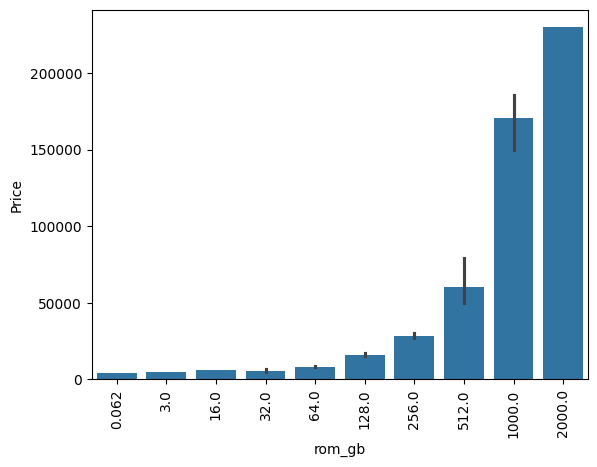

In [302]:
sns.barplot(data=df_smart, x='rom_gb', y='Price', estimator = 'median') # mobile with above 8 gb internal memory
plt.xticks(rotation=90)

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 [Text(-250.0, 0, '−250'),
  Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000'),
  Text(2250.0, 0, '2250')])

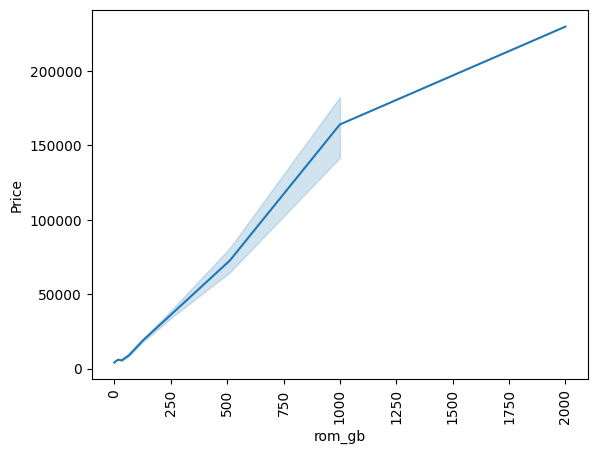

In [303]:
sns.lineplot(data=df_smart, x='rom_gb', y='Price') # mobile with above 8 gb internal memory
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '0.031'),
  Text(1, 0, '0.125'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '8.0'),
  Text(7, 0, '12.0'),
  Text(8, 0, '16.0'),
  Text(9, 0, '18.0'),
  Text(10, 0, '24.0')])

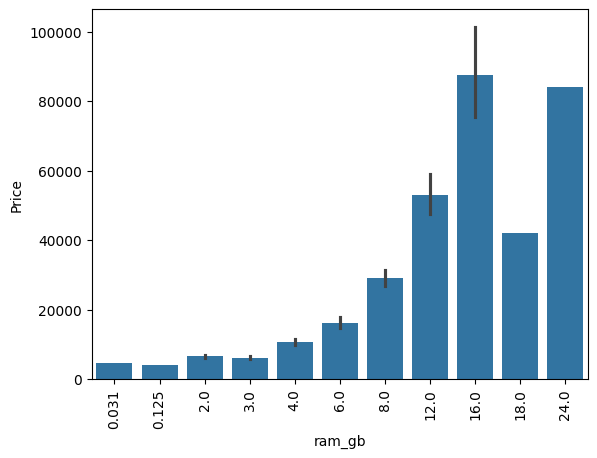

In [304]:
# only seeing ram of smartphone

sns.barplot(data=df_smart, x='ram_gb', y='Price', estimator = 'mean') 
plt.xticks(rotation=90)

In [305]:
df_smart[df_smart['ram_gb'] <= 1]

,Product_Name,brand_name,Price,Rating,Spec_Score,has_dual_sim,has_3g,has_4g,has_5g,has_nfc,...,front_camera_mp,front_camera_secondary_mp,rear_camera_mp,rear_camera_secondary_mp,rear_camera_tertiary_mp,rear_camera_count,card_supported,device_type,os_type,os_version
391,HMD Touch 4G,hmd,3999,4.55,26,1,1,1,0,0,...,0.3,0.0,2.0,0.0,0.0,1,1,smartphone,Unknown,NaN
824,MTR M16 Pro,mtr,4600,4.30,29,1,1,1,0,0,...,NaN,0.0,5.0,0.0,0.0,1,1,smartphone,Android,13.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '0.031'),
  Text(1, 0, '0.125'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '8.0'),
  Text(7, 0, '12.0'),
  Text(8, 0, '16.0'),
  Text(9, 0, '18.0'),
  Text(10, 0, '24.0')])

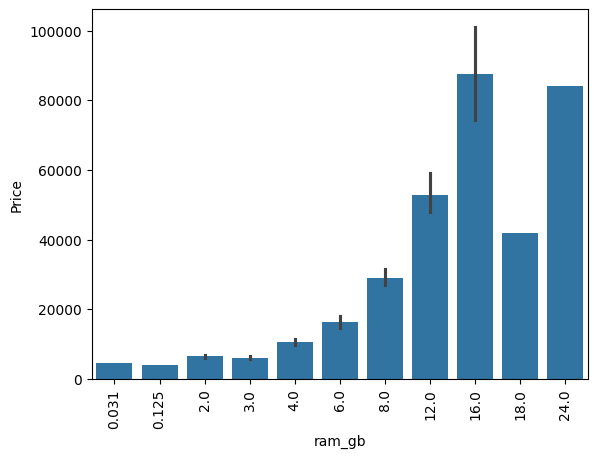

In [306]:
sns.barplot(data=df_smart, x='ram_gb', y='Price', estimator = 'mean') 
plt.xticks(rotation=90)

<span style="font-size: 18px;"> <b><center> Price and Battery

(array([1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000'),
  Text(8000.0, 0, '8000')])

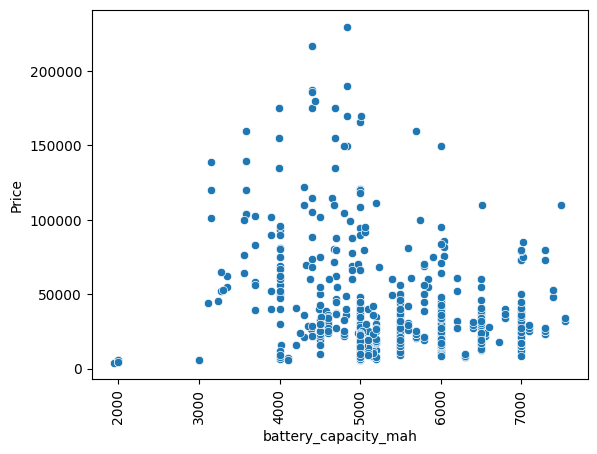

In [307]:
sns.scatterplot(data=df_smart, x='battery_capacity_mah', y='Price')
plt.xticks(rotation=90)

(array([1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000'),
  Text(8000.0, 0, '8000')])

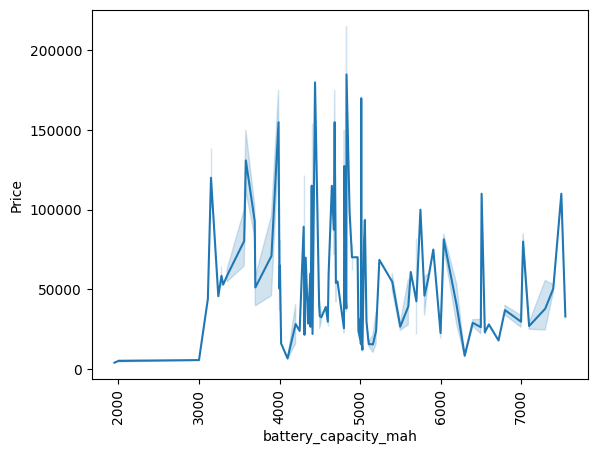

In [308]:
sns.lineplot(data=df_smart, x='battery_capacity_mah', y='Price')
plt.xticks(rotation=90)

<span style="font-size: 18px;"> <b><center> Price and fast_charging

<Axes: xlabel='fast_charging_available', ylabel='Price'>

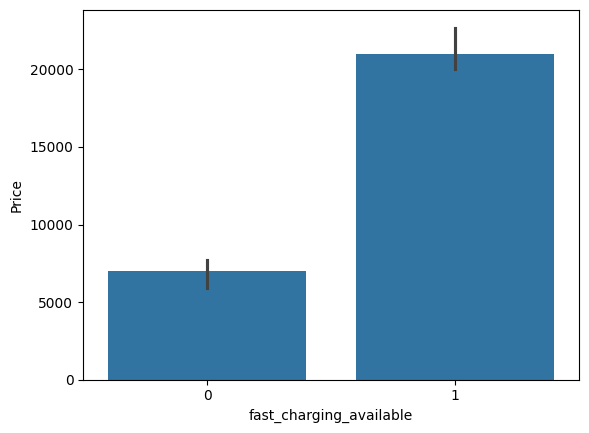

In [309]:
sns.barplot(data=df_smart, x='fast_charging_available', y='Price', estimator='median')

<span style="font-size: 18px;"> <b><center> Price and fast_charging_speed

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, '0.0'),
  Text(1, 0, '5.0'),
  Text(2, 0, '10.0'),
  Text(3, 0, '15.0'),
  Text(4, 0, '18.0'),
  Text(5, 0, '20.0'),
  Text(6, 0, '23.0'),
  Text(7, 0, '25.0'),
  Text(8, 0, '27.0'),
  Text(9, 0, '30.0'),
  Text(10, 0, '33.0'),
  Text(11, 0, '35.0'),
  Text(12, 0, '37.0'),
  Text(13, 0, '44.0'),
  Text(14, 0, '45.0'),
  Text(15, 0, '50.0'),
  Text(16, 0, '60.0'),
  Text(17, 0, '65.0'),
  Text(18, 0, '66.0'),
  Text(19, 0, '67.0'),
  Text(20, 0, '68.0'),
  Text(21, 0, '70.0'),
  Text(22, 0, '80.0'),
  Text(23, 0, '90.0'),
  Text(24, 0, '100.0'),
  Text(25, 0, '120.0'),
  Text(26, 0, '125.0'),
  Text(27, 0, '150.0')])

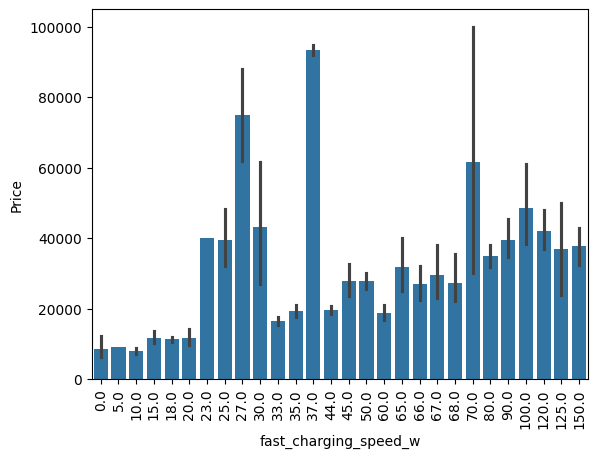

In [310]:
sns.barplot(data=df_smart, x='fast_charging_speed_w', y='Price', estimator='mean')
plt.xticks(rotation=90)

<span style="font-size: 18px;"> <b><center> Price and display inch

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55],
 [Text(0, 0, '3.2'),
  Text(1, 0, '3.75'),
  Text(2, 0, '4.0'),
  Text(3, 0, '4.5'),
  Text(4, 0, '5.0'),
  Text(5, 0, '5.5'),
  Text(6, 0, '5.99'),
  Text(7, 0, '6.1'),
  Text(8, 0, '6.14'),
  Text(9, 0, '6.18'),
  Text(10, 0, '6.2'),
  Text(11, 0, '6.26'),
  Text(12, 0, '6.3'),
  Text(13, 0, '6.31'),
  Text(14, 0, '6.32'),
  Text(15, 0, '6.36'),
  Text(16, 0, '6.38'),
  Text(17, 0, '6.4'),
  Text(18, 0, '6.43'),
  Text(19, 0, '6.44'),
  Text(20, 0, '6.45'),
  Text(21, 0, '6.47'),
  Text(22, 0, '6.5'),
  Text(23, 0, '6.52'),
  Text(24, 0, '6.53'),
  Text(25, 0, '6.55'),
  Text(26, 0, '6.56'),
  Text(27, 0, '6.57'),
  Text(28, 0, '6.58'),
  Text(29, 0, '6.59'),
  T

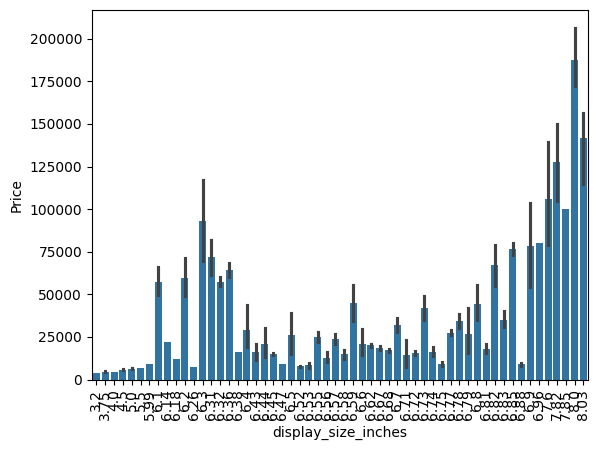

In [311]:
sns.barplot(data=df_smart, x='display_size_inches', y='Price', estimator='mean')
plt.xticks(rotation=90)

(array([2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9')])

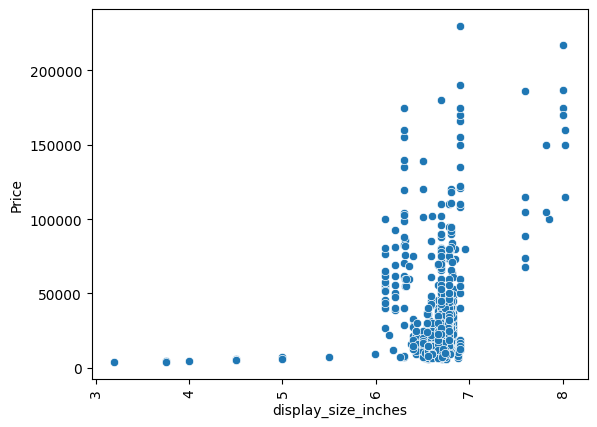

In [312]:
sns.scatterplot(data=df_smart, x='display_size_inches', y='Price')
plt.xticks(rotation=90)

<span style="font-size: 18px;"> <b><center> Price and device type

([0, 1], [Text(0, 0, 'smartphone'), Text(1, 0, 'feature_phone')])

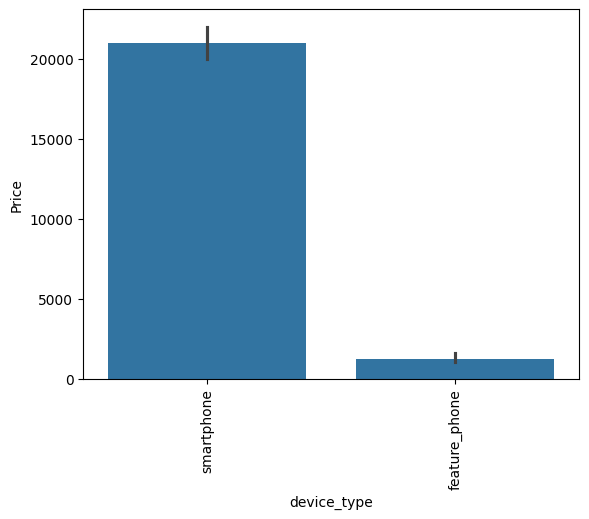

In [313]:
sns.barplot(data=df, x='device_type', y='Price', estimator='median')
plt.xticks(rotation=90)

In [314]:
temp_df = df[df['device_type'] == 'feature_phone']

<span style="font-size: 18px;"> <b> <center>Correlation of All columns

In [315]:
df_smart.corr(numeric_only = True) 

,Price,Rating,Spec_Score,has_dual_sim,has_3g,has_4g,has_5g,has_nfc,has_ir_blaster,cores,...,resolution_height,display_frequency_hz,front_camera_mp,front_camera_secondary_mp,rear_camera_mp,rear_camera_secondary_mp,rear_camera_tertiary_mp,rear_camera_count,card_supported,os_version
Price,1.000000,0.025249,0.567792,-0.026245,NaN,NaN,0.259666,0.517456,0.017055,-0.172349,...,0.452494,0.169178,0.395509,0.271152,0.293250,0.470791,0.348462,0.323613,-0.446460,0.519519
Rating,0.025249,1.000000,0.039595,0.052450,NaN,NaN,0.043900,0.089512,-0.009549,-0.020634,...,0.020363,0.034718,0.078759,-0.000016,0.044091,0.001238,0.020502,-0.010141,0.009685,0.002374
Spec_Score,0.567792,0.039595,1.000000,-0.021792,NaN,NaN,0.577966,0.555072,0.190677,0.311468,...,0.779868,0.505459,0.537748,0.171434,0.454800,0.546439,0.408959,0.581409,-0.366601,0.144077
has_dual_sim,-0.026245,0.052450,-0.021792,1.000000,NaN,NaN,-0.012219,-0.038358,0.021114,-0.004464,...,-0.022841,-0.011290,0.020089,0.003906,0.043450,0.002959,0.006163,0.017649,0.058354,NaN
has_3g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_4g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_5g,0.259666,0.043900,0.577966,-0.012219,NaN,NaN,1.000000,0.280167,0.061336,0.167530,...,0.440470,0.570766,0.233367,0.034006,0.216228,0.204054,0.258237,0.165320,-0.194514,0.291562
has_nfc,0.517456,0.089512,0.555072,-0.038358,NaN,NaN,0.280167,1.000000,0.105785,-0.023417,...,0.432452,0.173376,0.267065,0.129363,0.214682,0.425660,0.142525,0.380630,-0.297755,0.195852
has_ir_blaster,0.017055,-0.009549,0.190677,0.021114,NaN,NaN,0.061336,0.105785,1.000000,0.090350,...,0.281556,0.234079,0.120440,0.081753,0.214808,0.171893,0.119538,0.126788,-0.121785,-0.070492
cores,-0.172349,-0.020634,0.311468,-0.004464,NaN,NaN,0.167530,-0.023417,0.090350,1.000000,...,0.139080,0.304496,0.064064,0.016701,0.128833,-0.018402,0.024800,0.179490,0.119234,-0.337360


<Axes: >

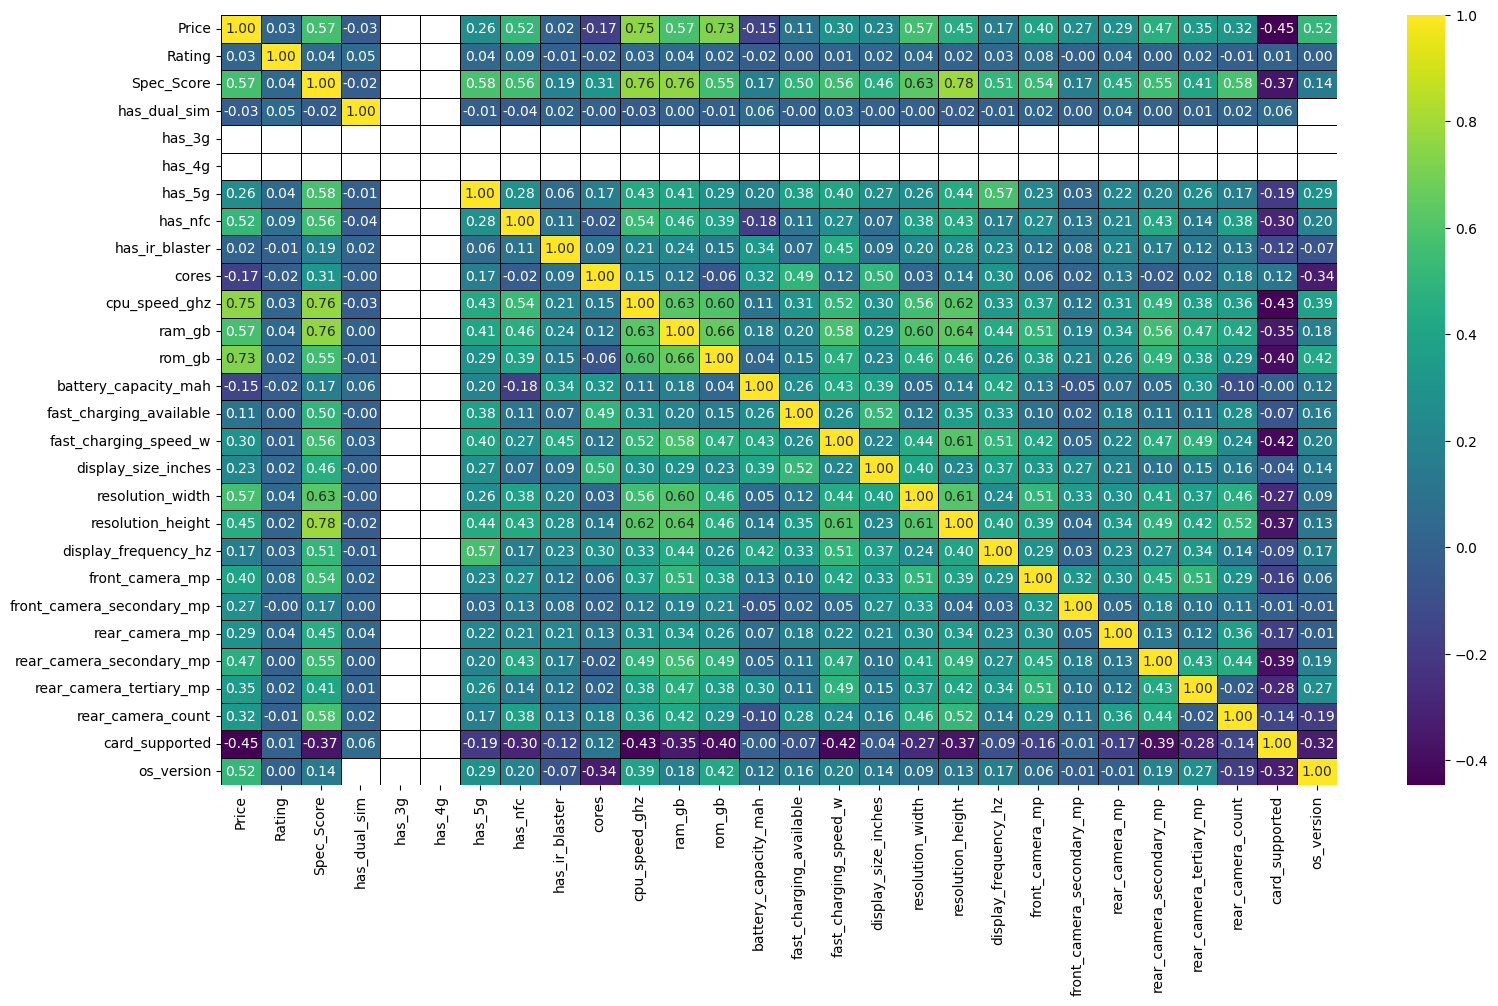

In [316]:
plt.figure(figsize=(18,10))

sns.heatmap(df_smart.corr(numeric_only = True), 
            annot=True,
            fmt=".2f",
            linewidths=0.5, 
            linecolor= 'black', 
            cmap='viridis')

In [317]:
df_smart['cpu_speed_ghz'].value_counts().reset_index().sort_values(by='cpu_speed_ghz', ascending=False)

,cpu_speed_ghz,count
21,4.600,7
15,4.470,13
16,4.320,9
22,4.210,7
20,4.050,7
18,4.040,9
36,3.840,2
30,3.780,5
29,3.630,5
34,3.460,3


In [318]:
df_smart['cpu_speed_ghz'].value_counts(bins=5, sort=False)

(-0.0046, 0.921]      6
(0.921, 1.841]       36
(1.841, 2.76]       584
(2.76, 3.68]        231
(3.68, 4.6]          59
Name: count, dtype: int64

<span style="font-size: 24px;"> <b> <center>Correlation of All columns with Price

In [319]:
df_smart.corr(numeric_only=True)['Price']

Price                        1.000000
Rating                       0.025249
Spec_Score                   0.567792
has_dual_sim                -0.026245
has_3g                            NaN
has_4g                            NaN
has_5g                       0.259666
has_nfc                      0.517456
has_ir_blaster               0.017055
cores                       -0.172349
cpu_speed_ghz                0.751490
ram_gb                       0.574100
rom_gb                       0.727346
battery_capacity_mah        -0.150554
fast_charging_available      0.110960
fast_charging_speed_w        0.301266
display_size_inches          0.230508
resolution_width             0.569304
resolution_height            0.452494
display_frequency_hz         0.169178
front_camera_mp              0.395509
front_camera_secondary_mp    0.271152
rear_camera_mp               0.293250
rear_camera_secondary_mp     0.470791
rear_camera_tertiary_mp      0.348462
rear_camera_count            0.323613
card_support

In [320]:
df_smart.corr(numeric_only=True)['Spec_Score']

Price                        0.567792
Rating                       0.039595
Spec_Score                   1.000000
has_dual_sim                -0.021792
has_3g                            NaN
has_4g                            NaN
has_5g                       0.577966
has_nfc                      0.555072
has_ir_blaster               0.190677
cores                        0.311468
cpu_speed_ghz                0.763536
ram_gb                       0.762470
rom_gb                       0.554937
battery_capacity_mah         0.170288
fast_charging_available      0.499094
fast_charging_speed_w        0.559021
display_size_inches          0.463037
resolution_width             0.630377
resolution_height            0.779868
display_frequency_hz         0.505459
front_camera_mp              0.537748
front_camera_secondary_mp    0.171434
rear_camera_mp               0.454800
rear_camera_secondary_mp     0.546439
rear_camera_tertiary_mp      0.408959
rear_camera_count            0.581409
card_support

## <b> <center>Using KNN to fill the missing values

Great question 👍 — this is actually a **perfect dataset to *learn* KNN Imputer**, because you have a mix of numeric, binary, and categorical features with *partial* missingness.

Let’s break this **conceptually first**, then I’ll show **exactly where KNN Imputer makes sense** and where it **does NOT**.

---

<h3> 1️⃣ What KNN Imputer is good at (intuition) </h3>

KNN Imputer fills missing values by:

* Finding **similar rows (phones)** based on other features
* Taking the **average (or weighted average)** of neighbors

👉 So it **works best on numeric, continuous, comparable features**.

🚫 It **does NOT naturally work** on:

* Strings (names, brands)
* Categorical labels (unless encoded carefully)

---

<h2> 2️⃣ Columns where KNN Imputer is ❌ NOT suitable </h2>

These should **NOT** be imputed using KNN:

<h3> ❌ Text / categorical (string-based) </h3>

```text
Product_Name
brand_name
processor_name
processor_brand
device_type
os_type
os_version
```

Why?

* KNN computes distance → strings have **no numeric meaning**
* Even label encoding will introduce **fake distances**

👉 For learning purposes:

* Drop them OR
* Impute with `"Unknown"` / mode

---

<h2> 3️⃣ Columns where KNN Imputer is ⚠️ NOT IDEAL (binary flags) </h2>

These are binary (0/1):

```text
has_dual_sim
has_3g
has_4g
has_5g
has_nfc
has_ir_blaster
fast_charging_available
card_supported
```

KNN will give values like:

```
0.33, 0.67, 1.0
```

That’s **mathematically correct but logically wrong**.

👉 For learning:

* You *can* try KNN just to see behavior
* But better:

  * Use **mode imputation**
  * Or round after KNN (not ideal)

---

<h2> 4️⃣ ✅ BEST columns to use KNN Imputer (this is your answer) </h2>

These are **numeric, continuous, correlated features** — PERFECT for KNN 👇

<h3> ⭐ Primary KNN candidates </h3>

```text
cores
cpu_speed_ghz
ram_gb
rom_gb
battery_capacity_mah
fast_charging_speed_w
display_size_inches
resolution_width
resolution_height
display_frequency_hz
front_camera_mp
rear_camera_mp
rear_camera_secondary_mp
rear_camera_tertiary_mp
rear_camera_count
```

<h3> Why these work well: </h3>

* Phones with similar specs → similar missing values
* Distances are meaningful
* Correlation exists (RAM ↔ CPU ↔ Price ↔ Score)

---

<h2> 5️⃣ Recommended learning setup (best practice) </h2>

<h3> Step 1: Select only numeric columns for KNN </h3>

```python
knn_cols = [
    'cores', 'cpu_speed_ghz', 'ram_gb', 'rom_gb',
    'fast_charging_speed_w',
    'resolution_width', 'resolution_height',
    'front_camera_mp', 'rear_camera_mp'
]
```

<h3> Step 2: Scale before KNN (VERY IMPORTANT) </h3>

```python
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[knn_cols])
```

<h3> Step 3: Apply KNN Imputer </h3>

```python
imputer = KNNImputer(n_neighbors=5, weights='distance')
X_imputed = imputer.fit_transform(X_scaled)
```

<h3> Step 4: Inverse scale </h3>

```python
df[knn_cols] = scaler.inverse_transform(X_imputed)
```

---

<h2> 6️⃣ Learning experiments you SHOULD try 🧪 </h2>

Since you said **learning purpose**, try these:

<h3> 🔬 Experiment 1 </h3>

* KNN vs Mean Imputation
* Compare RMSE on artificially removed values

<h3> 🔬 Experiment 2 </h3>

* Try `n_neighbors = 3, 5, 7`
* Observe smoothing effect

<h2> 🔬 Experiment 3 </h3>

* Add `Price` and `Spec_Score` as features
* See how imputation improves

---

<h2> 7️⃣ Final Rule of Thumb (memorize this) </h2>

> **KNN Imputer = Numeric + Correlated + Similar Samples**


In [321]:
df.isnull().sum()

Product_Name                  0
brand_name                    0
Price                         0
Rating                        0
Spec_Score                    0
has_dual_sim                  0
has_3g                        0
has_4g                        0
has_5g                        0
has_nfc                       0
has_ir_blaster                0
processor_name               50
processor_brand              50
cores                        55
cpu_speed_ghz                77
ram_gb                        4
rom_gb                        6
battery_capacity_mah          0
fast_charging_available       0
fast_charging_speed_w        53
display_size_inches           0
resolution_width              9
resolution_height             9
display_frequency_hz          0
front_camera_mp              62
front_camera_secondary_mp     0
rear_camera_mp                4
rear_camera_secondary_mp      0
rear_camera_tertiary_mp       0
rear_camera_count             0
card_supported                0
device_t

In [322]:
df.shape 

(1020, 34)

> In KNN imputer, these values in 34d space are ploted and fill the missing values with the weighted mean of neighbors 

In [323]:
# Features with missing values (to be imputed)
features_to_impute = [
    'front_camera_mp',         # 62 missing
    'cpu_speed_ghz',           # 77 missing
    'fast_charging_speed_w',   # 53 missing
    'ram_gb',                  # 4 missing
    'rom_gb',                  # 6 missing
    'rear_camera_mp',          # 4 missing
    'resolution_width',        # 9 missing
    'resolution_height'        # 9 missing
]

In [324]:
# Helper features (complete, help improve KNN accuracy)
helper_features = [
    'Price',                   # Strong predictor
    'Rating',
    'Spec_Score',
    'battery_capacity_mah',
    'display_size_inches',
    'display_frequency_hz',
    'has_5g',
    'rear_camera_count'
]

In [325]:
# Extract data
all_features = features_to_impute + helper_features
df_for_knn = df[all_features].copy()

In [326]:
from sklearn.impute import KNNImputer

In [327]:
# Create KNN Imputer
knn_imputer = KNNImputer(n_neighbors=7, weights= 'distance', keep_empty_features=True) # weight for weighted mean  

In [328]:
# Apply KNN
df_imputed = knn_imputer.fit_transform(df_for_knn) # this is a numpy array have to convert into the dataframe

In [329]:
df_imputed = pd.DataFrame(df_imputed, columns=all_features, index=df.index)
df_imputed.head()

,front_camera_mp,cpu_speed_ghz,fast_charging_speed_w,ram_gb,rom_gb,rear_camera_mp,resolution_width,resolution_height,Price,Rating,Spec_Score,battery_capacity_mah,display_size_inches,display_frequency_hz,has_5g,rear_camera_count
0,12.0,4.470000,45.0,12.0,256.0,200.0,1440.0,3120.0,108460.0,4.15,93.0,5000.0,6.90,120.0,1.0,4.0
1,12.0,3.200000,45.0,8.0,128.0,50.0,1080.0,2340.0,59999.0,4.70,86.0,4900.0,6.70,120.0,1.0,3.0
2,16.0,3.350000,80.0,8.0,128.0,50.0,1080.0,2392.0,24998.0,4.10,83.0,7100.0,6.77,120.0,1.0,2.0
3,50.0,2.325941,60.0,6.0,128.0,50.0,1080.0,2372.0,16999.0,4.40,72.0,7000.0,6.57,120.0,1.0,2.0
4,50.0,3.350000,80.0,8.0,128.0,50.0,1260.0,2800.0,22799.0,4.10,82.0,5500.0,6.78,120.0,1.0,2.0


In [330]:
# adding all the other columns in the new df
fill_df = df.copy()
fill_df[features_to_impute] = df_imputed[features_to_impute]

In [334]:
a = fill_df.corr(numeric_only= True)['Price'].reset_index()
b = df.corr(numeric_only= True)['Price'].reset_index()

c = b.merge(a,on='index')

c['diff'] = -1 * (c['Price_x'] - c['Price_y'])
c

,index,Price_x,Price_y,diff
0,Price,1.000000,1.000000,-0.000000
1,Rating,0.027051,0.027051,-0.000000
2,Spec_Score,0.457031,0.457031,-0.000000
3,has_dual_sim,0.100217,0.100217,-0.000000
4,has_3g,0.185098,0.185098,-0.000000
5,has_4g,0.168580,0.168580,-0.000000
6,has_5g,0.334542,0.334542,-0.000000
7,has_nfc,0.539180,0.539180,-0.000000
8,has_ir_blaster,0.051891,0.051891,-0.000000
9,cores,-0.084645,-0.084645,-0.000000


## <center> One-Hot Encoding </center>

- One-hot encoding is a preprocessing technique that converts categorical data into a numerical binary format (0s and 1s) by creating new, separate columns for each unique category. It enables machine learning models to process nominal data without implying any, false, ordered, or, mathematical, ranking, between, categories. 

> As Machine can only understands number and also ML works on number so we convert the categories columns into the numbers like 1, 2 and 3 (at least ML model can process the data) but the ML algo can give more weighage to the 2 and 3 so that why 3 columns are created for 1, 2 and 3 in which 0 means not and 1 means present.
>> Note: Generally for last categorical new column does not get created because if all the values are 0 for all categories then logically the remaining category is present

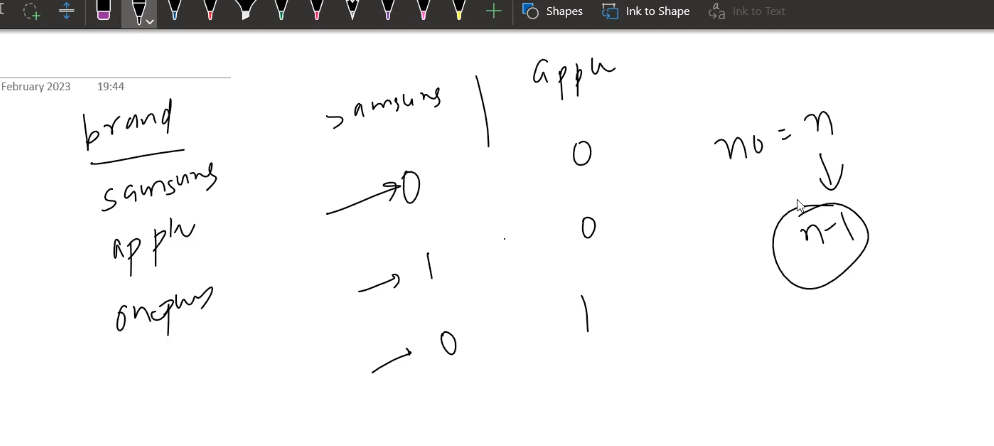

In [338]:
# Encode several categorical columns together
categorical_cols = ['brand_name', 'processor_brand', 'device_type']

df_encoded = pd.get_dummies(
    df, 
    columns=categorical_cols,
    drop_first=True  # Recommended
)

print(f"Before: {df.shape[1]} columns")
print(f"After: {df_encoded.shape[1]} columns")


Before: 34 columns
After: 76 columns


In [339]:
df_encoded.head()

,Product_Name,Price,Rating,Spec_Score,has_dual_sim,has_3g,has_4g,has_5g,has_nfc,has_ir_blaster,...,brand_name_xiaomi,processor_brand_Apple,processor_brand_Dimensity,processor_brand_Exynos,processor_brand_Helio,processor_brand_MediaTek,processor_brand_Snapdragon,processor_brand_Tensor,processor_brand_Unisoc,device_type_smartphone
0,Samsung Galaxy S25 Ultra,108460,4.15,93,1,1,1,1,1,0,...,False,False,False,False,False,False,True,False,False,True
1,Samsung Galaxy S25 FE,59999,4.70,86,1,1,1,1,1,0,...,False,False,False,True,False,False,False,False,False,True
2,OnePlus Nord CE 5 5G,24998,4.10,83,1,1,1,1,0,1,...,False,False,True,False,False,False,False,False,False,True
3,Realme Narzo 90,16999,4.40,72,1,1,1,1,0,0,...,False,False,True,False,False,False,False,False,False,True
4,Vivo T3 Ultra,22799,4.10,82,1,1,1,1,0,0,...,False,False,True,False,False,False,False,False,False,True


In [344]:
pd.set_option('display.max_columns', None)

# Show all rows
pd.set_option('display.max_rows', None)

# Optional: Show full content of each cell (prevent "..." in text)
pd.set_option('display.max_colwidth', None)

In [345]:
df_encoded.corr(numeric_only=True)['Price']

Price                         1.000000
Rating                        0.027051
Spec_Score                    0.457031
has_dual_sim                  0.100217
has_3g                        0.185098
has_4g                        0.168580
has_5g                        0.334542
has_nfc                       0.539180
has_ir_blaster                0.051891
cores                        -0.084645
cpu_speed_ghz                 0.708312
ram_gb                        0.592288
rom_gb                        0.742064
battery_capacity_mah          0.062560
fast_charging_available       0.240673
fast_charging_speed_w         0.359020
display_size_inches           0.278763
resolution_width              0.570234
resolution_height             0.465319
display_frequency_hz          0.256731
front_camera_mp               0.397960
front_camera_secondary_mp     0.270728
rear_camera_mp                0.345869
rear_camera_secondary_mp      0.493048
rear_camera_tertiary_mp       0.377709
rear_camera_count        

Perfect! Here's your **complete guide to One-Hot Encoding using Pandas** with practical examples from your mobile dataset:

***

<h3> 🎯 **What is One-Hot Encoding?** </h3>

**Problem**: ML models need numbers, not text!
```python
❌ brand_name = 'samsung'  # Can't do math with this
✅ brand_samsung = 1        # Can use in calculations
✅ brand_apple = 0
```

***

<h2> 📚 **Complete One-Hot Encoding Tutorial** </h2>

<h3> **SCENARIO 1: Binary Categories (2 options)** </h3>

```python
import pandas as pd

# Load data
df = pd.read_csv('smartprix_mobiles_cleaned_final.csv')

# device_type: smartphone or feature_phone

# Method A: Basic encoding (creates 2 columns)
device_encoded = pd.get_dummies(df['device_type'], prefix='device')
# Result: device_feature_phone, device_smartphone

# Method B: Drop first (BEST for ML - creates 1 column)
device_encoded = pd.get_dummies(df['device_type'], prefix='device', drop_first=True)
# Result: device_smartphone only (0=feature_phone, 1=smartphone)
```

**Why `drop_first=True`?**
- If `device_smartphone = 0` → it's a feature phone
- If `device_smartphone = 1` → it's a smartphone
- Saves memory & avoids multicollinearity

***

<h3>  **SCENARIO 2: Multi-Category (Many options)**  </h3>

```python
# brand_name has 37 different brands!

# Method 1: Encode all brands (NOT RECOMMENDED)
brand_encoded = pd.get_dummies(df['brand_name'], prefix='brand')
# Problem: Creates 37 columns! Too many!

# Method 2: Smart encoding - Group rare categories
top_brands = df['brand_name'].value_counts().head(10).index.tolist()
df['brand_grouped'] = df['brand_name'].apply(
    lambda x: x if x in top_brands else 'other'
)

# Now encode the grouped version
brand_encoded = pd.get_dummies(df['brand_grouped'], prefix='brand', drop_first=True)
# Result: Only 10 columns instead of 37! ✅
```

**Best Practice**: Keep only top 10-15 categories, group rest as 'other'

***

### **SCENARIO 3: Encode Multiple Columns at Once**

```python
# Encode several categorical columns together
categorical_cols = ['brand_name', 'processor_brand', 'device_type']

df_encoded = pd.get_dummies(
    df, 
    columns=categorical_cols,
    drop_first=True  # Recommended
)

print(f"Before: {df.shape [ppl-ai-file-upload.s3.amazonaws](https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/attachments/20925570/dd837341-25de-486c-bfee-15006aa1fbf4/smartprix_mobiles_cleaned_final.csv)} columns")
print(f"After: {df_encoded.shape [ppl-ai-file-upload.s3.amazonaws](https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/attachments/20925570/dd837341-25de-486c-bfee-15006aa1fbf4/smartprix_mobiles_cleaned_final.csv)} columns")
```

***

<h3> **SCENARIO 4: Complete ML Pipeline (BEST PRACTICES)** </h3>

```python
import pandas as pd

# Load data
df = pd.read_csv('smartprix_mobiles_cleaned_final.csv')

# STEP 1: Drop unnecessary columns
drop_cols = ['Product_Name', 'Product_Link', 'Image_URL', 
             'Specifications', 'processor_name', 'operating_system']
df_ml = df.drop(columns=drop_cols)

# STEP 2: Handle ordinal data (convert to numeric first)
core_mapping = {
    'Single Core': 1, 'Dual Core': 2, 'Quad Core': 4,
    'Hexa Core': 6, 'Octa Core': 8, 'Nine Core': 9, 'Deca Core': 10
}
df_ml['num_cores'] = df_ml['cores'].map(core_mapping)
df_ml = df_ml.drop('cores', axis=1)

# STEP 3: Group high-cardinality categories
top_brands = df_ml['brand_name'].value_counts().head(10).index
df_ml['brand_grouped'] = df_ml['brand_name'].apply(
    lambda x: x if x in top_brands else 'other'
)
df_ml = df_ml.drop('brand_name', axis=1)

# STEP 4: One-hot encode remaining categorical columns
categorical_cols = ['brand_grouped', 'processor_brand', 'device_type']
df_ml_final = pd.get_dummies(df_ml, columns=categorical_cols, drop_first=True)

# STEP 5: Verify
print(f"✅ Final shape: {df_ml_final.shape}")
print(f"✅ All numeric: {df_ml_final.select_dtypes(include='number').shape [ppl-ai-file-upload.s3.amazonaws](https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/attachments/20925570/dd837341-25de-486c-bfee-15006aa1fbf4/smartprix_mobiles_cleaned_final.csv)} columns")
print(f"✅ Ready for ML!")

# Save encoded dataset
df_ml_final.to_csv('mobiles_encoded.csv', index=False)
```

***

<h2> 🎓 **Key Learning Points** </h2>

<h3> **When to Use Each Method** </h3>

| Categories | Method | Example |
|------------|--------|---------|
| **2 categories** | `drop_first=True` | device_type: smartphone/feature_phone |
| **3-10 categories** | `drop_first=True` | processor_brand (9 brands) |
| **10-50 categories** | **Group + encode** | brand_name (37 → 10 brands) |
| **50+ categories** | **Avoid OHE**, use Label Encoding or Embeddings | processor_name (197 types) |

<h3> **Common Parameters** </h3>

```python
pd.get_dummies(
    data,                    # DataFrame or Series
    columns=['col1', 'col2'], # Columns to encode
    prefix='feature',        # Column name prefix
    drop_first=True,         # Drop first category (recommended)
    dtype=int                # Output data type (int or bool)
)
```

***

<h3> ⚡ **Quick Comparison** </h3>

| Before Encoding | After Encoding (drop_first=True) |
|-----------------|----------------------------------|
| brand_name: 37 unique | 36 binary columns |
| device_type: 2 unique | 1 binary column |
| **Total**: 2 columns | **Total**: 37 columns |

**Memory Impact**: 1020 rows × 37 new columns = 37,740 new values!

***

<h3> ✅ **Best Practices Summary** </h3>

1. ✅ **Always use `drop_first=True`** for ML models
2. ✅ **Group rare categories** (>15 categories → group to top 10)
3. ✅ **Convert ordinal data to numeric** (don't one-hot encode "Small/Medium/Large")
4. ✅ **Drop text columns** (Product_Name, URLs, descriptions)
5. ✅ **Check final shape** (avoid >100 columns for small datasets)
6. ✅ **Save encoded data** for reuse

***

<h3> 🚀 **Your Turn - Practice Exercise** </h3>

```python
# Try encoding these columns yourself:
# 1. processor_brand (9 categories) - use drop_first=True
# 2. operating_system (22 categories) - extract OS type first, then encode
# 3. Create a function to automate the entire process

def encode_dataset(df, top_n_brands=10):
    """
    One-hot encode mobile dataset with best practices
    
    Parameters:
    -----------
    df : DataFrame
        Original mobile dataset
    top_n_brands : int
        Number of top brands to keep
        
    Returns:
    --------
    DataFrame : Encoded dataset ready for ML
    """
    # Your code here!
    pass
```

Your dataset is now fully prepared for machine learning with intelligent one-hot encoding! 🎉